# Title: **Machine Learning for Precipitation Prediction in Malaysia**

Group Member:


1.   Nur Hidayah binti Ahmad Shafii (22120931) - Data cleaning and preprocessing
2.   Choon Yue Hua (17152027) - EDA
2.   Then Dao Qing (23057608) - EDA
2.   Choo Wan Qi (23069166) - Data Modelling
2.   Low Meng Fei (23063305) - Data Modelling

Lecturer: Muhammad Shahreeza Safiruz bin Kasim

Course: WQD7006 (Machine Learning for Data Science)
  



# 1. **Business Background**

The unpredictable shifts in the Earth's climate have become one of the most pressing global challenges. In response to the urgency of the situation, The United Nation introduced Sustainable Development Goal (SDG) 13 to encourage immediate action to tackle climate change and reduce its impact. Climate change is mainly driven by the increase in greenhouse gases, which is largely due to human activities ​(Vishvakarma, 2022)​. Human activities like deforestation, industrialization, and unsustainable consumption contribute significantly to this increase.

Malaysia is among the nations that are becoming susceptible to its devastating effects. Extreme weather events such as more frequent heatwaves and severe flooding have become common ​(Sulaiman et al., 2022; Tang, 2019)​. These irregular and intense climate patterns not only threaten lives but also cause significant damage to property and infrastructure.  

Machine learning techniques have been applied to predict various climate-related phenomena to help decision-makers. This is because the machine learning model makes it possible to make more accurate predictions considering they are more flexible and able to capture complex relationships. The advancement of algorithms for machine learning allows computers to learn from data and enhance their performance on specific tasks ​(Ahmad Hamdan et al., 2024; Mahesh, 2019)​. This involves utilising diverse and extensive data to identify trends, create predictions, and inform the decision-making process ​(Ahmad Hamdan et al., 2024)​.

Existing studies have highlighted the potential of hybrid machine learning models in improving climate-related predictions, particularly rainfall forecasting in Malaysia ​(Sulaiman et al., 2022)​. Research by ​Wamanse & Patil (2022)​ explored the integration of various climate change parameters using models like linear regression, exponential regression, and polynomial regression. Similarly, ​Vishvakarma (2022)​ demonstrated the effectiveness of advanced machine learning models such as Random Forest, XGBoost, KNN, and their hyperparameter-optimized variants to enhance predictive accuracy. Based on previous research, it can be concluded that Machine Learning can predict flood risks, rainfall patterns, and other climate-related phenomena. Therefore, this study aims to evaluate the performance of Random Forest, Gradient Boosting, and Linear Regression in predicting precipitation and flood risks. Ultimately, the study seeks to propose the most accurate and reliable model for addressing Malaysia's climate challenges effectively.

## 1.1 Objective





1. To evaluate the performance of Random Forest, Gradient Boosting, and Linear Regression in predicting precipitation.
2. To propose the most accurate model for forecasting precipitation and managing climate risks.


# 2. **Method and Analysis**



## 2.1 Data Collection

In [ ]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [ ]:
file_path = '/content/WQD7006.xlsx'

In [ ]:
df1 = pd.read_excel(file_path, sheet_name='Labuan')
df2 = pd.read_excel(file_path, sheet_name='Kuala Lumpur')

In [ ]:
df1.head()


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TMAX,TMIN,SLP,H,PRCP,VV,V,VM,VG,RA,SN,TS,FG
0,MY000096465,"LABUAN, MY",5.3,115.25,30,1998-01-01,27.8,31.3,25.5,1011.4,81.7,8.13,20.6,13.9,21.0,NaN,1,0,0,0.0
1,MY000096465,"LABUAN, MY",5.3,115.25,30,1998-02-01,28.0,32.2,25.1,1012.2,80.6,2.03,13.9,11.7,19.3,NaN,2,0,1,0.0
2,MY000096465,"LABUAN, MY",5.3,115.25,30,1998-03-01,29.6,34.0,26.3,1010.6,74.9,0.00,5.1,11.4,20.0,NaN,0,0,0,0.0
3,MY000096465,"LABUAN, MY",5.3,115.25,30,1998-04-01,29.5,34.4,26.4,1010.1,78.0,39.11,7.0,8.7,17.3,NaN,3,0,5,0.0
4,MY000096465,"LABUAN, MY",5.3,115.25,30,1998-05-01,30.0,33.9,26.4,1009.1,76.7,174.75,21.7,8.2,14.8,NaN,9,0,10,0.0


In [ ]:
df2.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TMAX,TMIN,SLP,H,PRCP,VV,V,VM,VG,RA,SN,TS,FG
0,MYM00048650,"KUALA LUMPUR INTERNATIONAL, MY",2.746,101.71,21,1998-01-01,28.3,33.4,24.6,1011.3,76.5,224.27,13.1,7.1,16.2,NaN,11.0,0.0,12.0,1.0
1,MYM00048650,"KUALA LUMPUR INTERNATIONAL, MY",2.746,101.71,21,1998-02-01,29.0,34.8,25.1,1011.9,73.9,135.13,13.1,6.4,15.3,NaN,9.0,0.0,11.0,0.0
2,MYM00048650,"KUALA LUMPUR INTERNATIONAL, MY",2.746,101.71,21,1998-03-01,29.1,35.0,25.2,1010.6,74.5,184.15,11.3,6.7,15.7,NaN,9.0,0.0,14.0,0.0
3,MYM00048650,"KUALA LUMPUR INTERNATIONAL, MY",2.746,101.71,21,1998-04-01,29.7,35.3,25.7,1009.8,75.4,184.17,10.3,6.5,15.6,NaN,10.0,0.0,15.0,0.0
4,MYM00048650,"KUALA LUMPUR INTERNATIONAL, MY",2.746,101.71,21,1998-05-01,29.6,34.7,25.8,1008.9,76.3,378.97,13.4,6.7,13.7,NaN,16.0,0.0,14.0,0.0


In [ ]:
#shape
print(df1.shape)
print(df2.shape)

(312, 20)
(312, 20)


The data was initially obtained from NOAA - National Centre for Environment Information database. Then, it is compiled and made accessible through the Omdena platform at https://datasets.omdena.com/dataset/climate-risk-prediction-(malaysia) and  website that hosts several secondary websites named Tutiempo  (https://en.tutiempo.net/). Regarding the reliability of the dataset, it is assumed the data provided by NOAA accurately reflects the data in the region and that the compilation process on both platform maintains the integrity of the original listings. However, it is crucial to check for missing values, inconsistencies, and outliers during data preprocessing to ensure it is suitable for analysis.

Initially, the dataset in the Excel workbook consists of two subsets, named Labuan and Kuala Lumpur. Each subset comprises 312 rows and 20 columns respectively from 1998 to 2023. The dataset collected comprises various attributes related to climate data for two states in Malaysia. These include numerical variables such as temperature, precipitation latitude, longitude, and elevation. Also, categorical variables like station and name which represent the specific locations.



 The definition of the variables are as such:


1.   STATION: A unique identifier for the weather station.
2.   NAME: The name of the weather station.
2.   LATITUDE: The latitude of the weather station in decimal degrees.
2.   LONGITUDE: The longitude of the weather station in decimal degrees.
2.   ELEVATION: The elevation of the weather station in meters.
2.   DATE: The date of the record in YYYY-MM-DD format.
2.   TAVG: The average of the daily maximum and minimum temperatures of the month in degrees Celsius.
2.   TMAX: The mean of the daily maximum temperatures of the month in degrees Celsius .
2.   TMIN: The mean of the daily minimum temperatures of the month in degrees Celsius.
3.   SLP: The average atmospheric pressure at sea level of the month measured in hPa.
11.  H: The mean relative humidity percentage of the month measured in %.
2.   PRCP: The total amount of precipitation of the month in millimeters.
13.  VV: The average visibility of the month measured in km.
3.   V: The average wind speed of the month in km/h.
15. VM: The average of the daily maximum sustained wind speeds of the month measured in km/h.
11.  VG: The average of the daily maximum speed of wind of the month measured in km/h.
2.   RA: The total number of days in the month during which rain or drizzle was observed.
13.  SN: The total number of days in the month during which snow was observed.
2.   TS: The total number of days in the month during which thunderstorms occurred.
13.  FG: The total number of days in the month during which fog was observed.


## 2.2 Data Cleaning and Preprocessing

### Sanity Check of Data

Firstly, the data was imported into two dataframes named df1 and df2. Then, a sanity check was performed using df.info() to check the overview of the dataset. This helps to identify issues such as missing values or incorrect data types. To address the missing values, we used df.isnull()to identify the columns of missing data.

 From overview, both datasets have completely missing VG features. Hence, we will drop the VG column as it is irrelevant to the analysis. The missing values in data will be grouped by month and imputed using the median to preserve data integrity.

There was no duplication value in both datasets. Lastly, we performed a check for garbage values. The SLP column was found to contain invalid entries represented by "-". These will be replaced with NaN to standardize missing values and allow for proper imputation.

On the other hand, the STATION and NAME columns in each dataframe contained only a single unique value, which might need to be evaluated during the final stages of the data cleaning process.

 Additionally, the DATE column will be extracted into separate YEAR and MONTH columns to enable more detailed temporal analysis. After completing the cleaning process for both datasets, they will be merged to create a unified dataset for further analysis.

In [ ]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    312 non-null    object        
 1   NAME       312 non-null    object        
 2   LATITUDE   312 non-null    float64       
 3   LONGITUDE  312 non-null    float64       
 4   ELEVATION  312 non-null    int64         
 5   DATE       312 non-null    datetime64[ns]
 6   TAVG       312 non-null    float64       
 7   TMAX       312 non-null    float64       
 8   TMIN       312 non-null    float64       
 9   SLP        312 non-null    object        
 10  H          312 non-null    float64       
 11  PRCP       312 non-null    float64       
 12  VV         312 non-null    float64       
 13  V          312 non-null    float64       
 14  VM         312 non-null    float64       
 15  VG         0 non-null      float64       
 16  RA         312 non-null    int64         
 1

From the information above, both datasets have completely missing VG features. Hence, we will drop the VG column since it is likely relevant to the analysis. The missing values in df2 will be imputed with the median. The DATE column will be extracted to  YEAR and MONTH for more detailed temporal analysis. After cleaning both datasets, the datasets will be merged for further analysis.

In [ ]:
#finding missing value
df1.isnull().sum()

,0
STATION,0
NAME,0
LATITUDE,0
LONGITUDE,0
ELEVATION,0
DATE,0
TAVG,0
TMAX,0
TMIN,0
SLP,0


In [ ]:
df2.isnull().sum()

,0
STATION,0
NAME,0
LATITUDE,0
LONGITUDE,0
ELEVATION,0
DATE,0
TAVG,6
TMAX,6
TMIN,6
SLP,6


In [ ]:
#finding duplicates
print(df1.duplicated().sum())
print(df2.duplicated().sum())

0
0


There is no duplicate for both datasets

In [ ]:
#identify garbage values in df1
for i in df1.select_dtypes(include='object').columns:
  print(df1[i].value_counts())
  print("***"*10)

STATION
MY000096465    312
Name: count, dtype: int64
******************************
NAME
LABUAN, MY    312
Name: count, dtype: int64
******************************
SLP
-         33
1009.4    19
1009.1    17
1009.8    17
1009      16
1009.3    16
1009.6    16
1009.7    15
1009.5    14
1009.2    14
1010.1    11
1008.7    11
1010.3    10
1010       9
1010.4     9
1008.8     8
1008.9     8
1008.5     7
1008.6     6
1010.2     5
1009.9     5
1008.4     4
1008.3     4
1010.6     3
1010.7     3
1011       3
1010.8     3
1011.2     3
1007.8     3
1011.4     2
1011.1     2
1008.1     2
1007.9     2
1010.5     2
1007.3     1
1012.8     1
1011.5     1
1010.9     1
1011.3     1
1008.2     1
1012.2     1
1008       1
1007.7     1
1006.5     1
Name: count, dtype: int64
******************************


For the Labuan dataset:

STATION: Contains only a single unique value (MY000096465) across all rows.

NAME:Contains only one unique value (LABUAN, MY).

SLP: Replace the "-" values with NaN


In [ ]:
#identify garbage values in df2
for i in df2.select_dtypes(include='object').columns:
  print(df2[i].value_counts())
  print("***"*10)

STATION
MYM00048650    312
Name: count, dtype: int64
******************************
NAME
KUALA LUMPUR INTERNATIONAL, MY    312
Name: count, dtype: int64
******************************
SLP
1009.6    22
-         20
1009.3    16
1010.3    15
1010.5    15
1009.5    15
1009.8    14
1009.2    13
1009.4    13
1010.2    12
1010.1    11
1009.7    11
1009.9    10
1008.9    10
1009.1     9
1011.2     9
1010       9
1010.8     8
1010.4     8
1011       7
1010.6     7
1008.5     6
1008.7     5
1008.8     5
1011.5     4
1008.4     4
1011.4     3
1011.6     3
1008.2     2
1008.6     2
1010.9     2
1011.8     2
1010.7     2
1009       2
1011.7     1
1012.1     1
1007.5     1
1011.3     1
1008.1     1
1008       1
1007.9     1
1011.9     1
1007.7     1
1011.1     1
Name: count, dtype: int64
******************************


For the Kuala Lumpur dataset:

STATION: Contains only a single unique value (MYM00048650) across all rows.

NAME:Contains only one unique value (KUALA LUMPUR INTERNATIONAL, MY).


SLP: Replace the "-" values with NaN

### Date Formatting

To standardize the data, the column was formatted to datetime using the pd.to_datetime() function. This step enables us to extract relevant temporal features such as the year and month for analysis.

In [ ]:

# Expand DATE into YEAR and MONTH
df1['YEAR'] = df1['DATE'].dt.year
df1['MONTH'] = df1['DATE'].dt.month

df2['YEAR'] = df2['DATE'].dt.year
df2['MONTH'] = df2['DATE'].dt.month


### Missing Value Treatments

The median is chosen because it is not affected by outlier. If there were missing values in TMAX or TMIN, it would be crucial to drop the affected rows, as these variables are closely related to other variables. However, there are no missing values in the temperature variables upon checking.


Since both datasets have completely missing values in the VG column, this column will be dropped as it is irrelevant to the analysis.

In [ ]:
# Drop missing values in VG column
df1.drop(columns=['VG'], inplace=True)
df2.drop(columns=['VG'], inplace=True)

Convert the garbage values in SLP column to numeric to ensure that all values in the column are either valid for analysis or imputation.

In [ ]:
# Handle garbage values in SLP column for df1 and df2
df1['SLP'] = pd.to_numeric(df1['SLP'], errors='coerce')  # Convert "-" to NaN
df2['SLP'] = pd.to_numeric(df2['SLP'], errors='coerce')

Many weather-related variables (e.g., temperature, precipitation, humidity) vary significantly by month. Grouping by month ensures that missing values are filled with values relevant to that specific period.

In [ ]:
for col in df1.columns:
    if df1[col].isnull().sum() > 0:  # Check if there are missing values
        # Group by YEAR and MONTH and calculate the median for imputation
        df1[col] = df1.groupby(['MONTH'])[col].transform(lambda x: x.fillna(x.median()))

In [ ]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    312 non-null    object        
 1   NAME       312 non-null    object        
 2   LATITUDE   312 non-null    float64       
 3   LONGITUDE  312 non-null    float64       
 4   ELEVATION  312 non-null    int64         
 5   DATE       312 non-null    datetime64[ns]
 6   TAVG       312 non-null    float64       
 7   TMAX       312 non-null    float64       
 8   TMIN       312 non-null    float64       
 9   SLP        312 non-null    float64       
 10  H          312 non-null    float64       
 11  PRCP       312 non-null    float64       
 12  VV         312 non-null    float64       
 13  V          312 non-null    float64       
 14  VM         312 non-null    float64       
 15  RA         312 non-null    int64         
 16  SN         312 non-null    int64         
 1

In [ ]:
for col in df2.columns:
    if df2[col].isnull().sum() > 0:  # Check if there are missing values
        # Group by YEAR and MONTH and calculate the median for imputation
        df2[col] = df2.groupby(['MONTH'])[col].transform(lambda x: x.fillna(x.median()))

In [ ]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    312 non-null    object        
 1   NAME       312 non-null    object        
 2   LATITUDE   312 non-null    float64       
 3   LONGITUDE  312 non-null    float64       
 4   ELEVATION  312 non-null    int64         
 5   DATE       312 non-null    datetime64[ns]
 6   TAVG       312 non-null    float64       
 7   TMAX       312 non-null    float64       
 8   TMIN       312 non-null    float64       
 9   SLP        312 non-null    float64       
 10  H          312 non-null    float64       
 11  PRCP       312 non-null    float64       
 12  VV         312 non-null    float64       
 13  V          312 non-null    float64       
 14  VM         312 non-null    float64       
 15  RA         312 non-null    float64       
 16  SN         312 non-null    float64       
 1

### Merge the cleaned datasets

The dataframes are merged into a single dataset named data after there are no null values in either dataframe.

In [ ]:
data = pd.concat([df1, df2], ignore_index=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    624 non-null    object        
 1   NAME       624 non-null    object        
 2   LATITUDE   624 non-null    float64       
 3   LONGITUDE  624 non-null    float64       
 4   ELEVATION  624 non-null    int64         
 5   DATE       624 non-null    datetime64[ns]
 6   TAVG       624 non-null    float64       
 7   TMAX       624 non-null    float64       
 8   TMIN       624 non-null    float64       
 9   SLP        624 non-null    float64       
 10  H          624 non-null    float64       
 11  PRCP       624 non-null    float64       
 12  VV         624 non-null    float64       
 13  V          624 non-null    float64       
 14  VM         624 non-null    float64       
 15  RA         624 non-null    float64       
 16  SN         624 non-null    float64       
 1

### Renaming Columns

The NAME column is is renamed to standardize and simplify location names.

In [ ]:
#Rename the 'NAME' column
data['NAME'] = data['NAME'].replace({'LABUAN, MY': 'Labuan', 'KUALA LUMPUR INTERNATIONAL, MY': 'Kuala Lumpur'})

# Display the updated column
print(data['NAME'].value_counts())

NAME
Labuan          312
Kuala Lumpur    312
Name: count, dtype: int64


Checking the unique values for YEAR and MONTH column to ensure  the dataset covers the entire range.

In [ ]:
# Display all unique years in the dataset
unique_years = data['YEAR'].drop_duplicates().sort_values()

# Print the unique years
unique_years.tolist()

[1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023]

In [ ]:
# Display all unique months in the dataset
unique_months = data['MONTH'].drop_duplicates().sort_values()

# Print the unique years
unique_months.tolist()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

### Drop Irrelevant Column

In [ ]:
# Drop the 'STATION' column
data = data.drop('STATION', axis=1)

### Check and Remove Outlier

In [ ]:
data.describe()

,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TMAX,TMIN,SLP,H,PRCP,VV,V,VM,RA,SN,TS,FG,YEAR,MONTH
count,624.000000,624.000000,624.00000,624,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000
mean,4.023000,108.480000,25.50000,2010-12-16 04:36:55.384615424,27.908974,32.128205,24.542628,1009.667628,80.358173,229.993526,12.008654,6.412500,15.491506,17.690705,0.004808,14.410256,0.060897,2010.500000,6.500000
min,2.746000,101.710000,21.00000,1998-01-01 00:00:00,26.200000,28.600000,22.800000,1006.500000,66.100000,0.000000,2.800000,2.900000,8.700000,0.000000,0.000000,0.000000,0.000000,1998.000000,1.000000
25%,2.746000,101.710000,21.00000,2004-06-23 12:00:00,27.500000,31.200000,24.100000,1009.200000,77.900000,131.815000,9.600000,5.100000,13.600000,15.000000,0.000000,10.000000,0.000000,2004.000000,3.750000
50%,4.023000,108.480000,25.50000,2010-12-16 12:00:00,27.850000,32.100000,24.500000,1009.600000,80.550000,216.540000,10.800000,6.100000,15.800000,18.000000,0.000000,14.500000,0.000000,2010.500000,6.500000
75%,5.300000,115.250000,30.00000,2017-06-08 12:00:00,28.400000,32.900000,25.000000,1010.200000,83.300000,321.942500,14.100000,7.100000,17.200000,21.000000,0.000000,19.000000,0.000000,2017.000000,9.250000
max,5.300000,115.250000,30.00000,2023-12-01 00:00:00,30.000000,35.300000,26.400000,1012.800000,88.200000,988.580000,24.300000,16.700000,24.900000,30.000000,1.000000,30.000000,11.000000,2023.000000,12.000000
std,1.278024,6.775431,4.50361,NaN,0.653168,1.203889,0.628773,0.809689,3.804479,148.723641,3.476016,1.937889,2.743135,5.243555,0.069226,6.123787,0.521890,7.506017,3.454822


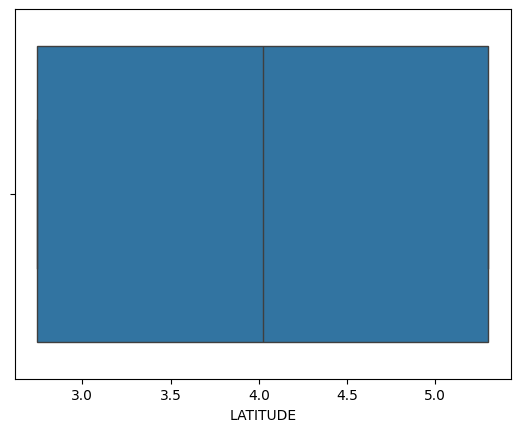

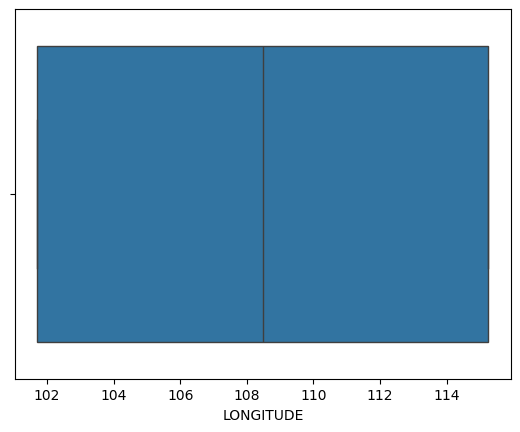

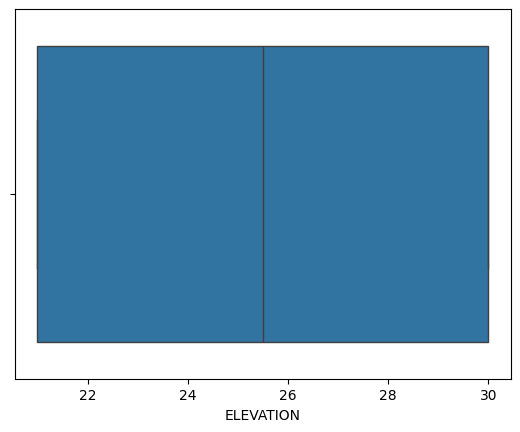

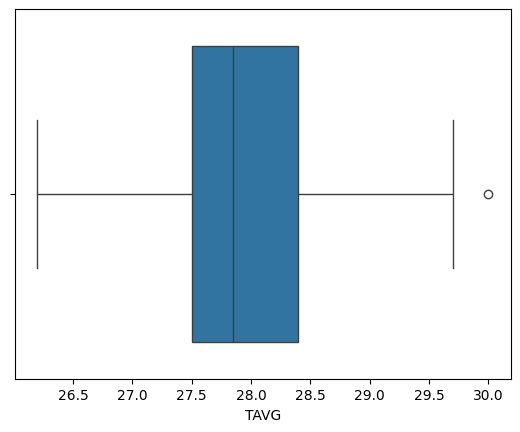

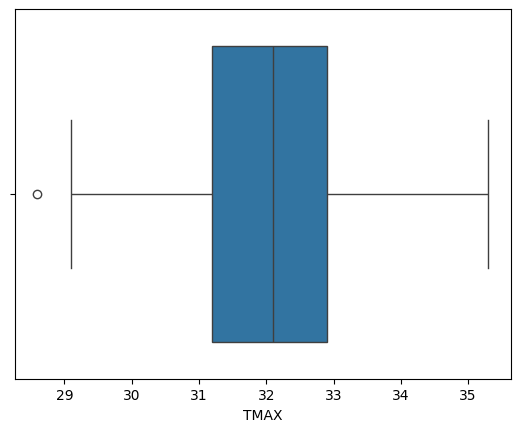

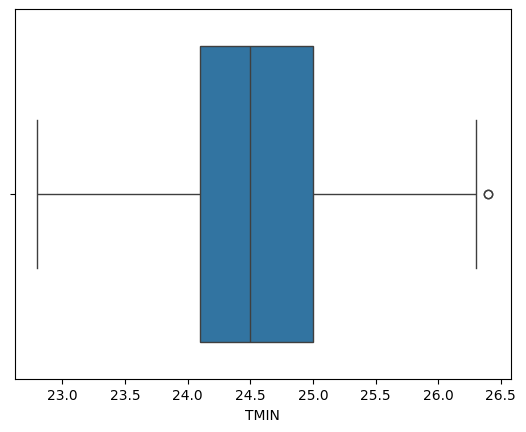

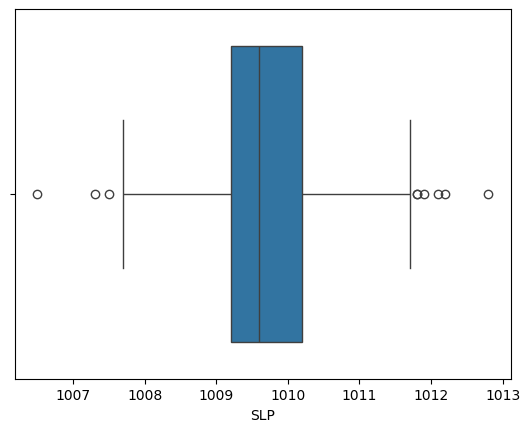

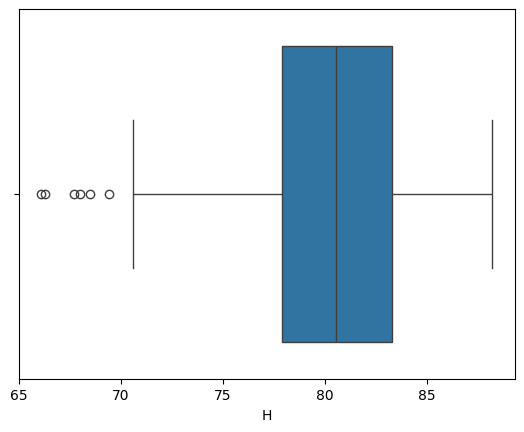

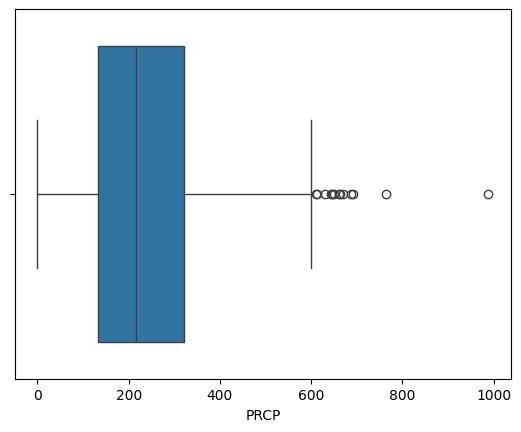

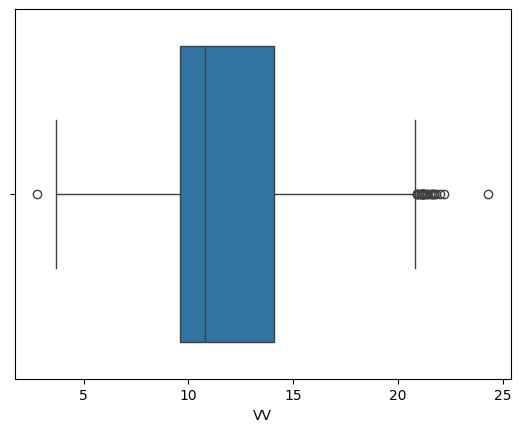

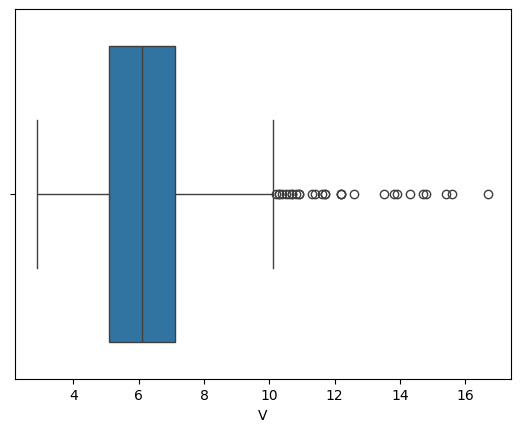

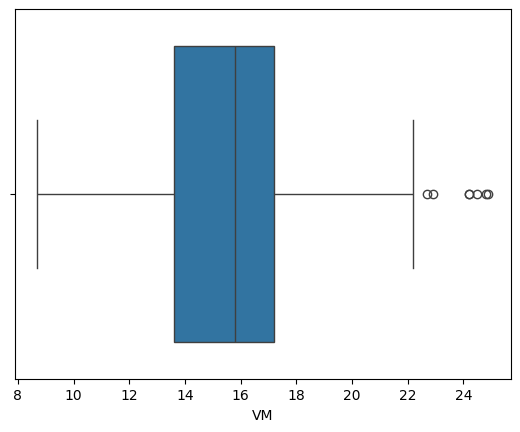

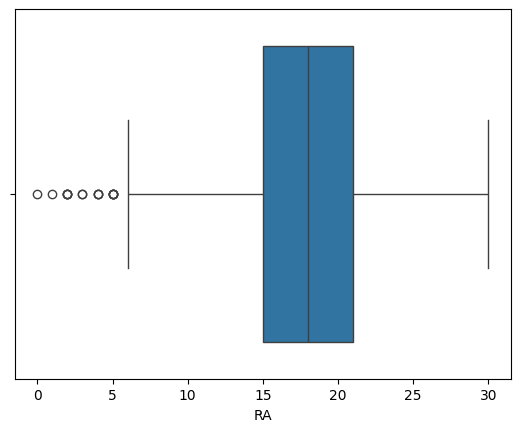

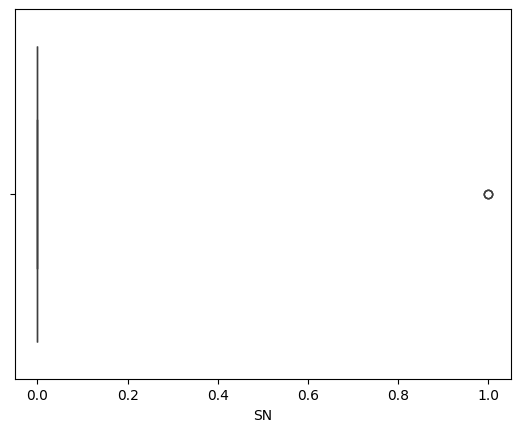

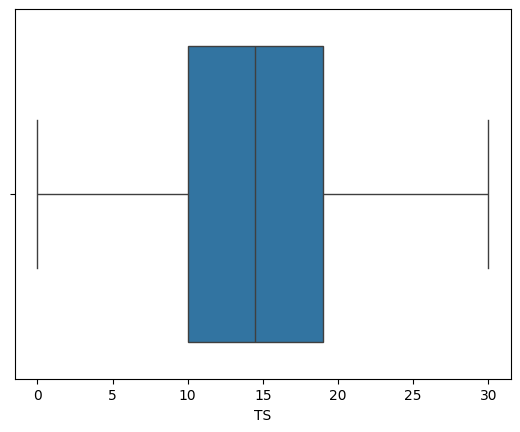

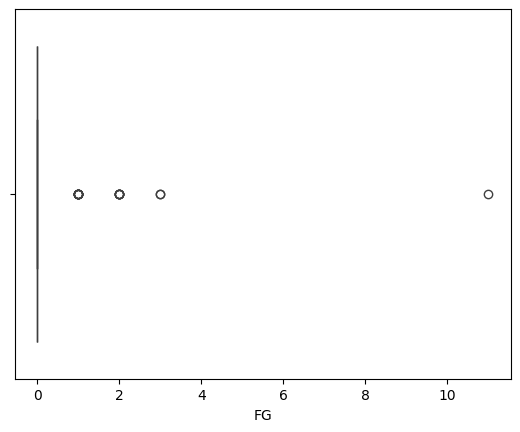

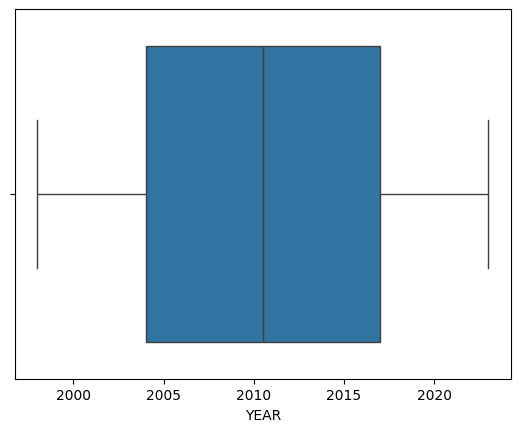

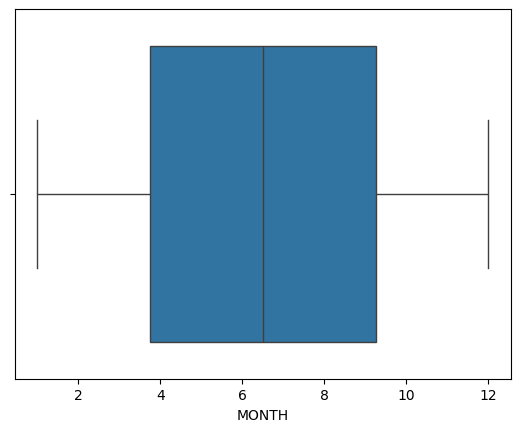

In [ ]:
#Boxplot to identify outlier
for i in data.select_dtypes(include='number').columns:
  sns.boxplot(data=data, x=i)
  plt.show()

Based on the boxplot analysis, we will drop the following columns:

LATITUDE, LONGITUDE, and ELEVATION: These columns are dropped as they only represent the location of the state and are not relevant to the current analysis.

SN: The snow days column is dropped because there is no snow in Malaysia. The outlier value in the SN column is likely an error.


Other features provide meaningful insights into weather patterns and are necessary for trend analysis. Outliers in weather data often indicate extreme weather events.

In [ ]:
# Drop the specified columns: LATITUDE, LONGITUDE, ELEVATION,
columns_to_drop = ['LATITUDE', 'LONGITUDE', 'ELEVATION', 'SN']
data.drop(columns=columns_to_drop, inplace=True)

# Confirm the columns have been dropped
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   NAME    624 non-null    object        
 1   DATE    624 non-null    datetime64[ns]
 2   TAVG    624 non-null    float64       
 3   TMAX    624 non-null    float64       
 4   TMIN    624 non-null    float64       
 5   SLP     624 non-null    float64       
 6   H       624 non-null    float64       
 7   PRCP    624 non-null    float64       
 8   VV      624 non-null    float64       
 9   V       624 non-null    float64       
 10  VM      624 non-null    float64       
 11  RA      624 non-null    float64       
 12  TS      624 non-null    float64       
 13  FG      624 non-null    float64       
 14  YEAR    624 non-null    int32         
 15  MONTH   624 non-null    int32         
dtypes: datetime64[ns](1), float64(12), int32(2), object(1)
memory usage: 73.2+ KB


### Column Formatting

In [ ]:
# Convert NAME to category
data['NAME'] = data['NAME'].astype('category')

In [ ]:
# Rename columns for clarity
data.rename(columns={
    'NAME': 'Location',
    'DATE': 'Date',
    'TAVG': 'TempAvg',
    'TMAX': 'TempMax',
    'TMIN': 'TempMin',
    'SLP': 'SeaPressure',
    'H': 'Humidity',
    'PRCP': 'Precipitation',
    'VV': 'Visibility',
    'V': 'WindSpeed',
    'VM': 'MaxWindSpeed',
    'RA': 'RainyDays',
    'TS': 'ThunderstormDays',
    'FG': 'FoggyDays',
    'YEAR': 'Year',
    'MONTH': 'Month'
}, inplace=True)

# Check the updated column names
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Location          624 non-null    category      
 1   Date              624 non-null    datetime64[ns]
 2   TempAvg           624 non-null    float64       
 3   TempMax           624 non-null    float64       
 4   TempMin           624 non-null    float64       
 5   SeaPressure       624 non-null    float64       
 6   Humidity          624 non-null    float64       
 7   Precipitation     624 non-null    float64       
 8   Visibility        624 non-null    float64       
 9   WindSpeed         624 non-null    float64       
 10  MaxWindSpeed      624 non-null    float64       
 11  RainyDays         624 non-null    float64       
 12  ThunderstormDays  624 non-null    float64       
 13  FoggyDays         624 non-null    float64       
 14  Year              624 non-

Malaysia experiences a hot and humid climate, with average outdoor temperatures ranging from 23.7°C to 31.3°C and daily relative humidity levels typically between 75% and 95% (Yau et al., 2012). According to Smart Fog article in 2024, higher temperatures causes faster water evaporation which resulted to increased humidity. However, rainfall can still occur even when the relative humidity at ground level not 100%.

Therefore, if both humidity is high (>75%) and rain is frequent (e.g., >7.5 days), a 0 precipitation value becomes almost impossible without errors.

In [ ]:
# Filter the data for the specific conditions
filtered_data = data[(data['Precipitation'] == 0) & (data['RainyDays'] > 7.5) & (data['Humidity'] > 75)]

# Display the filtered data
print(filtered_data[['Location', 'Humidity', 'Precipitation','RainyDays', 'ThunderstormDays', 'FoggyDays', 'Month', 'Year']])

         Location  Humidity  Precipitation  RainyDays  ThunderstormDays  \
12         Labuan      84.4            0.0       13.0               7.0   
13         Labuan      83.6            0.0       11.0               4.0   
14         Labuan      82.5            0.0       19.0               6.0   
15         Labuan      81.0            0.0       14.0               6.0   
16         Labuan      82.2            0.0       23.0              18.0   
17         Labuan      77.7            0.0       15.0               6.0   
18         Labuan      79.2            0.0       14.0               7.0   
19         Labuan      79.5            0.0       19.0              12.0   
189        Labuan      84.2            0.0       26.0              12.0   
191        Labuan      85.0            0.0       22.0              19.0   
194        Labuan      82.1            0.0        9.0              10.0   
195        Labuan      81.4            0.0       15.0              11.0   
197        Labuan      80

The precipitation data in the filtered dataset above might be recorded incorrectly. Therefore, we will group the data by month and fill in the missing or incorrect values with the median precipitation for each month.

In [ ]:
# Filter the data for the specific conditions
filtered_data = data[(data['Precipitation'] == 0) & (data['RainyDays'] > 7.5) & (data['Humidity'] > 75)]

# Calculate the median precipitation for each month across all years
median_precipitation_by_month = data.groupby('Month')['Precipitation'].median()

# Function to fill missing or zero precipitation values in the filtered data
def fill_filtered_precipitation(row):
    if row['Precipitation'] == 0:  # Check if the precipitation is missing or zero
        return median_precipitation_by_month[row['Month']]  # Use the median for the corresponding month
    return row['Precipitation']

# Apply the function only to the filtered data
filtered_data['Precipitation'] = filtered_data.apply(fill_filtered_precipitation, axis=1)

# Display the updated filtered data
print(filtered_data[['Location', 'Humidity', 'Precipitation', 'RainyDays', 'ThunderstormDays', 'FoggyDays', 'Month', 'Year']])


         Location  Humidity  Precipitation  RainyDays  ThunderstormDays  \
12         Labuan      84.4        236.730       13.0               7.0   
13         Labuan      83.6        122.160       11.0               4.0   
14         Labuan      82.5        193.425       19.0               6.0   
15         Labuan      81.0        226.695       14.0               6.0   
16         Labuan      82.2        175.630       23.0              18.0   
17         Labuan      77.7        185.165       15.0               6.0   
18         Labuan      79.2        165.865       14.0               7.0   
19         Labuan      79.5        194.825       19.0              12.0   
189        Labuan      84.2        303.525       26.0              12.0   
191        Labuan      85.0        286.270       22.0              19.0   
194        Labuan      82.1        193.425        9.0              10.0   
195        Labuan      81.4        226.695       15.0              11.0   
197        Labuan      80

In [ ]:
# Update the original data with modified precipitation values from filtered_data
data.update(filtered_data)

# Save the updated data to a new CSV file
data.to_csv('data_WQD7006.csv', index=False)

# Download the cleaned data file
from google.colab import files
files.download('data_WQD7006.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 2.3 Exploratory Data Analysis


In [ ]:
# Load dataset
df = pd.read_csv('/content/data_WQD7006_V1.csv')

###Univariate Analysis

**Annual Precipitation and Rainy Day**

This analysis provides insights into the total annual rainfall and the number of rainy days for each year. It highlights trends in precipitation and rainfall frequency over time, helping to identify wet and dry years.

In [ ]:
# Group data by Year and Location
annual_data = df.groupby(['Year', 'Location']).agg({'Precipitation': 'sum', 'RainyDays': 'sum'}).reset_index()

# Separate data for Labuan and Kuala Lumpur
labuan_annual = annual_data[annual_data['Location'] == 'Labuan']
kl_annual = annual_data[annual_data['Location'] == 'Kuala Lumpur']

# Create subplots with secondary y-axes
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Annual Precipitation & Rainy Days in Labuan', 'Annual Precipitation & Rainy Days in Kuala Lumpur'),
    shared_yaxes=False,  # Separate y-axes for each plot
    specs=[[{"secondary_y": True}, {"secondary_y": True}]]
)

# Add Precipitation (Bar Chart) and Rainy Days (Line Chart) for Labuan
fig.add_trace(
    go.Bar(
        x=labuan_annual['Year'],
        y=labuan_annual['Precipitation'],
        marker=dict(color=labuan_annual['Precipitation'], colorscale='Blues'),
        name='Annual Precipitation',  # Updated legend label
        legendgroup='Annual Precipitation'  # Group for shared legend
    ),
    row=1, col=1, secondary_y=False
)
fig.add_trace(
    go.Scatter(
        x=labuan_annual['Year'],
        y=labuan_annual['RainyDays'],
        name='Rainy Days',
        mode='lines+markers',
        line=dict(color='black', width=1.5),
        marker=dict(size=5, color='black', opacity=1),
        legendgroup='Rainy Days',  # Group for shared legend
        hovertemplate='<b>Year:</b> %{x}<br><b>Rainy Days:</b> %{y}'
    ),
    row=1, col=1, secondary_y=True
)

# Add Precipitation (Bar Chart) and Rainy Days (Line Chart) for Kuala Lumpur
fig.add_trace(
    go.Bar(
        x=kl_annual['Year'],
        y=kl_annual['Precipitation'],
        marker=dict(color=kl_annual['Precipitation'], colorscale='Blues'),
        name='Annual Precipitation',  # Updated legend label
        legendgroup='Annual Precipitation',  # Group for shared legend
        showlegend=False  # Prevent duplicate legends
    ),
    row=1, col=2, secondary_y=False
)
fig.add_trace(
    go.Scatter(
        x=kl_annual['Year'],
        y=kl_annual['RainyDays'],
        name='Rainy Days',
        mode='lines+markers',
        line=dict(color='black', width=1.5),
        marker=dict(size=5, color='black', opacity=1),
        legendgroup='Rainy Days',  # Group for shared legend
        showlegend=False,  # Prevent duplicate legends
        hovertemplate='<b>Year:</b> %{x}<br><b>Rainy Days:</b> %{y}'
    ),
    row=1, col=2, secondary_y=True
)

# Update layout
fig.update_layout(
    title='Annual Precipitation and Rainy Days by Location',
    height=600,
    width=1600,  # Increased width for better spacing
    title_x=0.5,
    plot_bgcolor='white',  # White background
    paper_bgcolor='white',  # White background
    showlegend=True  # Ensure the legend is displayed
)

# Update axes titles
fig.update_xaxes(title_text="Year", row=1, col=1)
fig.update_xaxes(title_text="Year", row=1, col=2)
fig.update_yaxes(title_text="Precipitation (mm)", secondary_y=False, row=1, col=1)
fig.update_yaxes(title_text="Rainy Days", secondary_y=True, row=1, col=1)
fig.update_yaxes(title_text="Precipitation (mm)", secondary_y=False, row=1, col=2)
fig.update_yaxes(title_text="Rainy Days", secondary_y=True, row=1, col=2)

# Update ranges for better visibility
fig.update_yaxes(range=[0, 4800], secondary_y=False, row=1, col=1)
fig.update_yaxes(range=[0, 280], secondary_y=True, row=1, col=1)
fig.update_yaxes(range=[0, 4800], secondary_y=False, row=1, col=2)
fig.update_yaxes(range=[0, 280], secondary_y=True, row=1, col=2)

# Show the interactive plot
fig.show()


In [ ]:
# Calculate the total and average annual precipitation for each location
average_annual_precipitation = (
    df.groupby('Location')['Precipitation'].sum() /
    df['Year'].nunique()  # Divide by the number of unique years
).reset_index()

# Rename columns for clarity
average_annual_precipitation.columns = ['Location', 'Average_Annual_Precipitation']

# Display the results
print(average_annual_precipitation)

       Location  Average_Annual_Precipitation
0  Kuala Lumpur                   2924.104038
1        Labuan                   2860.761346


**Insights:**

1. Annual Precipitation Patterns:
* Labuan:
Shows a generally high level of precipitation over the years, with a peak around 2010 and a gradual decline in recent years.
Precipitation values vary more significantly across years, indicating higher variability in rainfall.
* Kuala Lumpur:
Also demonstrates high levels of precipitation, though the year-to-year variability is slightly less pronounced compared to Labuan.
Precipitation remains relatively stable after 2010, suggesting consistent rainfall patterns.
2. Rainy Days Trends:
* Labuan:
The number of rainy days has remained relatively stable, averaging between 150 to 250 days annually, with occasional peaks.
There is no strong correlation between rainy days and precipitation, as some years have high precipitation with fewer rainy days, indicating heavy rainfall concentrated in fewer days.
* Kuala Lumpur:
Displays a similar trend of consistent rainy days, averaging around 150 to 200 days annually.
Rainy days appear slightly more correlated with precipitation compared to Labuan.

**Overall:**
* The average annual precipitation of Kuala Lumpur is 2924.1mm, while Labuan is 2860.8mm.
* Kuala Lumpur generally has higher total precipitation than Labuan, but both cities experience a similar number of rainy days.


**Monthly Precipitation and Temperature**

This explores how precipitation and average temperature vary across months. It identifies seasonal patterns, such as months with the highest rainfall or temperature peaks.

In [ ]:
# Group data by Location and Month for monthly averages
monthly_data = df.groupby(['Location', 'Month']).agg({
    'Precipitation': 'mean',
    'TempMax': 'mean',
    'TempMin': 'mean'
}).reset_index()

# Separate data for Labuan and Kuala Lumpur
labuan_monthly = monthly_data[monthly_data['Location'] == 'Labuan']
kl_monthly = monthly_data[monthly_data['Location'] == 'Kuala Lumpur']

# Create subplots with Labuan and Kuala Lumpur
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Monthly Precipitation and Temperatures in Labuan',
                    'Monthly Precipitation and Temperatures in Kuala Lumpur'),
    specs=[[{"secondary_y": True}, {"secondary_y": True}]]
)

# Add bar chart (Precipitation) and line charts (TempMax and TempMin) for Labuan
fig.add_trace(
    go.Bar(
        x=labuan_monthly['Month'],
        y=labuan_monthly['Precipitation'],
        name='Monthly Precipitation',  # Unified legend label
        legendgroup='Precipitation',  # Grouped for unified legend
        marker=dict(color='lightblue'),
        hovertemplate='Month: %{x}<br>Precipitation: %{y:.2f} mm'
    ),
    row=1, col=1, secondary_y=False
)

fig.add_trace(
    go.Scatter(
        x=labuan_monthly['Month'],
        y=labuan_monthly['TempMax'],
        mode='lines+markers+text',
        line=dict(color='red', width=2),
        name='Temp Max',  # Unified legend label
        legendgroup='TempMax',  # Grouped for unified legend
        text=[f"{temp:.0f}°C" for temp in labuan_monthly['TempMax']],  # Add text labels
        textposition='top center',
        hovertemplate='Month: %{x}<br>Temp Max: %{y:.2f} °C'
    ),
    row=1, col=1, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=labuan_monthly['Month'],
        y=labuan_monthly['TempMin'],
        mode='lines+markers+text',
        line=dict(color='blue', width=2, dash='dot'),
        name='Temp Min',  # Unified legend label
        legendgroup='TempMin',  # Grouped for unified legend
        text=[f"{temp:.0f}°C" for temp in labuan_monthly['TempMin']],  # Add text labels
        textposition='bottom center',
        hovertemplate='Month: %{x}<br>Temp Min: %{y:.2f} °C'
    ),
    row=1, col=1, secondary_y=True
)

# Add bar chart (Precipitation) and line charts (TempMax and TempMin) for Kuala Lumpur
fig.add_trace(
    go.Bar(
        x=kl_monthly['Month'],
        y=kl_monthly['Precipitation'],
        legendgroup='Precipitation',  # Grouped for unified legend
        showlegend=False,  # Suppress duplicate legend
        marker=dict(color='lightblue'),
        hovertemplate='Month: %{x}<br>Precipitation: %{y:.2f} mm'
    ),
    row=1, col=2, secondary_y=False
)

fig.add_trace(
    go.Scatter(
        x=kl_monthly['Month'],
        y=kl_monthly['TempMax'],
        mode='lines+markers+text',
        line=dict(color='red', width=2),
        legendgroup='TempMax',  # Grouped for unified legend
        showlegend=False,  # Suppress duplicate legend
        text=[f"{temp:.0f}°C" for temp in kl_monthly['TempMax']],  # Add text labels
        textposition='top center',
        hovertemplate='Month: %{x}<br>Temp Max: %{y:.2f} °C'
    ),
    row=1, col=2, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=kl_monthly['Month'],
        y=kl_monthly['TempMin'],
        mode='lines+markers+text',
        line=dict(color='blue', width=2, dash='dot'),
        legendgroup='TempMin',  # Grouped for unified legend
        showlegend=False,  # Suppress duplicate legend
        text=[f"{temp:.0f}°C" for temp in kl_monthly['TempMin']],  # Add text labels
        textposition='bottom center',
        hovertemplate='Month: %{x}<br>Temp Min: %{y:.2f} °C'
    ),
    row=1, col=2, secondary_y=True
)

# Update layout
fig.update_layout(
    title='Monthly Precipitation and Temperatures by Location',
    height=600,
    width=1600,  # Increased width for better spacing
    title_x=0.5,
    showlegend=True,
    plot_bgcolor='white',
    paper_bgcolor='white'
)

# Update axis titles and temperature range
fig.update_xaxes(title_text='Month', tickmode='array', tickvals=list(range(1, 13)),
                 ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                 row=1, col=1)
fig.update_xaxes(title_text='Month', tickmode='array', tickvals=list(range(1, 13)),
                 ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                 row=1, col=2)
fig.update_yaxes(title_text='Precipitation (mm)', secondary_y=False, row=1, col=1)
fig.update_yaxes(title_text='Temperature (°C)', secondary_y=True, range=[20, 40], row=1, col=1)
fig.update_yaxes(title_text='Precipitation (mm)', secondary_y=False, row=1, col=2)
fig.update_yaxes(title_text='Temperature (°C)', secondary_y=True, range=[20, 40], row=1, col=2)

# Show the plot
fig.show()


**Insight**:

1. Temperature Stability:

* Both locations experience variable precipitation, but the peaks and troughs occur in different months.
* In Labuan, temperatures range from 30°C to 32°C (Max) and remain constant at 25°C (Min).
* In Kuala Lumpur, temperatures range from 32°C to 34°C (Max) and remain constant at 24°C (Min), slightly lower than Labuan.

2. Precipitation Trends:

* Labuan:
Monthly precipitation (blue bars) shows significant variation.
Peak precipitation occurs in October, with relatively high values in May and November.
Drier months are February and March, with precipitation dropping significantly.
* Kuala Lumpur:
Monthly precipitation also varies, but the pattern differs from Labuan.
April and November stand out as the months with the highest precipitation.
Similar to Labuan, February appears to be one of the driest months.

**Overall:**

* Labuan has more pronounced spikes and variation in monthly rainfall compared to Kuala Lumpur.
* Kuala Lumpur shows a steadier increase and decrease in rainfall, with a broader peak in April and November.
*  Both locations experience drier months in February and March, suggesting a shared influence of a seasonal dry period.
* Heavy rainfall during the monsoon months is evident, but the timing varies, with Labuan’s peak in October-November and Kuala Lumpur’s in April and November.


**Average Monthly Rainy Days and Thunderstorm Days**

This examines the average number of rainy and thunderstorm days per month. It helps to pinpoint months prone to heavier rainfall and thunderstorms, revealing seasonal weather trends.

In [ ]:
# Group data by Location and Month to calculate the averages
average_monthly_stats = (
    df.groupby(['Location', 'Month'])[['RainyDays', 'ThunderstormDays']]
    .mean()
    .reset_index()
)

# Separate the data for Labuan and Kuala Lumpur
labuan_monthly_stats = average_monthly_stats[average_monthly_stats['Location'] == 'Labuan']
kl_monthly_stats = average_monthly_stats[average_monthly_stats['Location'] == 'Kuala Lumpur']


# Create subplots with Labuan and Kuala Lumpur
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=(
        'Average Monthly Rainy Days and Thunderstorm Days in Labuan',
        'Average Monthly Rainy Days and Thunderstorm Days in Kuala Lumpur'
    )
)

# Add lines for Rainy Days and Thunderstorm Days in Labuan
fig.add_trace(
    go.Scatter(
        x=labuan_monthly_stats['Month'],
        y=labuan_monthly_stats['RainyDays'],
        mode='lines+markers',
        line=dict(color='lightblue', width=2),
        name='Rainy Days',
        legendgroup='RainyDays',  # Shared legend
        hovertemplate='Month: %{x}<br>Rainy Days: %{y:.2f} days'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=labuan_monthly_stats['Month'],
        y=labuan_monthly_stats['ThunderstormDays'],
        mode='lines+markers',
        line=dict(color='darkblue', width=2, dash='dot'),
        name='Thunderstorm Days',
        legendgroup='ThunderstormDays',  # Shared legend
        hovertemplate='Month: %{x}<br>Thunderstorm Days: %{y:.2f} days'
    ),
    row=1, col=1
)

# Add lines for Rainy Days and Thunderstorm Days in Kuala Lumpur
fig.add_trace(
    go.Scatter(
        x=kl_monthly_stats['Month'],
        y=kl_monthly_stats['RainyDays'],
        mode='lines+markers',
        line=dict(color='lightblue', width=2),
        name='Rainy Days',
        legendgroup='RainyDays',  # Shared legend
        showlegend=False,  # Suppress duplicate legend
        hovertemplate='Month: %{x}<br>Rainy Days: %{y:.2f} days'
    ),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(
        x=kl_monthly_stats['Month'],
        y=kl_monthly_stats['ThunderstormDays'],
        mode='lines+markers',
        line=dict(color='darkblue', width=2, dash='dot'),
        name='Thunderstorm Days',
        legendgroup='ThunderstormDays',  # Shared legend
        showlegend=False,  # Suppress duplicate legend
        hovertemplate='Month: %{x}<br>Thunderstorm Days: %{y:.2f} days'
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(
    title='Average Monthly Rainy Days and Thunderstorm Days by Location',
    height=600,
    width=1600,  # Increased width for better spacing
    title_x=0.5,
    showlegend=True,
    template='plotly_white'
)

# Update x-axis for both subplots with month labels
fig.update_xaxes(
    title_text='Month',
    tickmode='array',
    tickvals=list(range(1, 13)),
    ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    row=1, col=1
)

fig.update_xaxes(
    title_text='Month',
    tickmode='array',
    tickvals=list(range(1, 13)),
    ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    row=1, col=2
)

# Update y-axis titles
fig.update_yaxes(title_text='Average Days', range=[0, 25], row=1, col=1)
fig.update_yaxes(title_text='Average Days', range=[0, 25], row=1, col=2)

# Show the plot
fig.show()


Insights:

1. Labuan:

* Rainy days are relatively consistent throughout the year, with a peak during the last quarter (October to December).
* February has the lowest average rainy days, indicating a drier period.
* Thunderstorm days are higher during April and May, potentially associated with inter-monsoon conditions.
* The number of thunderstorm days drops significantly during June to August, suggesting calmer weather during this period.

2. Kuala Lumpur:

* Rainy days increase significantly during March, April, and November, corresponding to inter-monsoon periods with high rainfall activity.
* February has the lowest average rainy days, similar to Labuan.
* Thunderstorm days peak sharply in April and November, aligning with periods of heavy rain and storms typical in inter-monsoon seasons.
* The number of thunderstorm days is generally lower in June and July.

Overall:

* Labuan shows more consistent rainy days, while Kuala Lumpur has distinct peaks in rainfall and thunderstorm activity.
* Labuan experiences relatively fewer thunderstorm days during June–August compared to Kuala Lumpur.
* Thunderstorm activity is more episodic and varies significantly across months, while rainy days are relatively steady.
* Both regions share a similar dip in rainy days in February, reflecting regional climatic patterns.

**Monthly Trends of Sea Pressure, Humidity, Wind Speed, and Visibility**

This analysis tracks the monthly variation of atmospheric pressure, humidity levels, wind speed, and visibility. It highlights seasonal changes in weather conditions and their potential implications for local climate patterns.

In [ ]:
# Interactive plots for each variable
variables = ["SeaPressure", "Humidity", "WindSpeed", "Visibility"]

# Group by 'Location' and 'Month' and calculate the mean for the specified columns
monthly_trends = df.groupby(['Location', 'Month'])[['SeaPressure', 'Humidity', 'WindSpeed', 'Visibility']].mean().reset_index()

for variable in variables:
    fig = px.line(
        monthly_trends,
        x='Month',
        y=variable,
        color='Location',  # Different colors for Labuan and KL
        title=f'Monthly Trend of {variable}',
        labels={'Month': 'Month', variable: variable},
        markers=True
    )
    fig.update_traces(line=dict(width=3))
    fig.update_layout(
        xaxis=dict(
            tickmode='array',
            tickvals=list(range(1, 13)),
            ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
            title="Month"
        ),
        yaxis_title=variable,
        template="plotly_white",
        height=500,
        width=800
    )
    fig.show()


Insights:

1. Sea Pressure
* Labuan: Sea pressure decreases significantly from January to May and gradually increases again from June to December.
* Kuala Lumpur: Similar seasonal behavior is observed, but the fluctuation is slightly more pronounced compared to Labuan.

2. Humidity
* Labuan: Consistently higher humidity levels (above 80%) throughout the year, with minor fluctuations.
* Kuala Lumpur: Lower overall humidity compared to Labuan. A notable dip occurs between May and August, followed by an increase toward the end of the year.

3. Wind Speed
* Labuan: Higher wind speeds, peaking in February and November, indicating seasonal wind systems or storms.
* Kuala Lumpur: Lower wind speeds overall, with minor seasonal changes.

4. Visibility
* Labuan: Higher visibility (above 13 km) throughout most of the year, slightly dropping from September to November.
* Kuala Lumpur: Lower visibility, consistently below 10 km, with minimal seasonal variation. The lower visibility could be due to urban pollution and haze during certain months.

**Rainfall Distribution in Labuan and Kuala Lumpur**

The precipitation levels are categorized into 6 types based on the amount of rainfall recorded:

* Cloudy: 0 mm to 10 mm
* Light Rain: 11 mm to 100 mm
* Moderate Rain: 101 mm to 300 mm
* Heavy Rain: 301 mm to 600 mm
* Very Heavy Rain: 601 mm to 800 mm
* Extreme Rain: 801 mm to 1000 mm

In [ ]:
# Assuming df is already loaded and contains 'Precipitation', 'Location', and 'PrecipitationType' columns
# Create the PrecipitationType column based on the specified bins
df['PrecipitationType'] = pd.cut(df['Precipitation'], bins=[-0.1, 10, 100, 300, 600, 800, 1000], labels=['Cloudy', 'Light', 'Moderate', 'Heavy', 'Very Heavy', 'Extreme'])

# Create a bar chart to visualize the distribution of rainfall in Labuan and Kuala Lumpur based on PrecipitationType
fig = px.histogram(
    df,
    x='PrecipitationType',
    color='Location',
    barmode='group',
    title='Rainfall Distribution in Labuan and Kuala Lumpur',
    labels={'PrecipitationType': 'Precipitation Category', 'Location': 'Location'},
    category_orders={'PrecipitationType': ['Cloudy', 'Light', 'Moderate', 'Heavy', 'Very Heavy', 'Extreme']}
)

# Update layout for better readability
fig.update_layout(
    height=600,
    width=800,
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    template="plotly_white"
)

# Show the plot
fig.show()


**Insights:**

1. The "Moderate" precipitation category shows the highest frequency for both Labuan and Kuala Lumpur, indicating that the majority of precipitation events fall into this range for both locations.

2. Labuan has a higher count of "Light" and "Moderate" precipitation events compared to Kuala Lumpur, suggesting that Labuan might generally experience more frequent but lighter rainfall events.

3. Kuala Lumpur shows a higher frequency of "Heavy" precipitation compared to Labuan, which suggests that Kuala Lumpur might experience more intense rainfall events on average.

4. Both locations have relatively few occurrences of "Very Heavy" and "Extreme" rainfall, suggesting that these extreme precipitation events are infrequent in both regions.

**Seasonal Trend**


From Malaysian Meteorological Department (https://www.met.gov.my/en/pendidikan/fenomena-cuaca/), Malaysia weather is characterized by 2 Monsoon regimes and the transition period between these 2 monsoons which is known as inter-monsoon period:

1. Northeast Monsoon (November to March):
This season typically brings heavy rainfall, especially to the eastern regions of Malaysia, and is characterized by strong winds from the northeast.

2. Inter-monsoon (April, May, October):
During this period, rainfall is more sporadic and less intense. It serves as a transitional phase between the two monsoon seasons.

3. Southwest Monsoon (June to September):
This season is dominated by winds from the southwest and generally brings less rain compared to the Northeast Monsoon. The weather is often drier with occasional short rainfall events.

In [ ]:
# Assign seasons based on the month
def assign_season(month):
    if month in [11, 12, 1, 2, 3]:
        return 'Northeast Monsoon'
    elif month in [4, 5, 10]:
        return 'Inter-monsoon'
    else:
        return 'Southwest Monsoon'

df['Season'] = df['Month'].apply(assign_season)

# Calculate total precipitation by year and season
seasonal_yearly_data = (
    df.groupby(['Location', 'Year', 'Season'])[['Precipitation', 'TempMax', 'TempMin']]
    .agg({'Precipitation': 'sum', 'TempMax': 'mean', 'TempMin': 'mean'})
    .reset_index()
)

# Calculate average total precipitation across all years for each season and location
seasonal_avg_data = (
    seasonal_yearly_data.groupby(['Location', 'Season'])[['Precipitation', 'TempMax', 'TempMin']]
    .mean()
    .reset_index()
)

# Filter data for Labuan and Kuala Lumpur
labuan_seasonal = seasonal_avg_data[seasonal_avg_data['Location'] == 'Labuan']
kl_seasonal = seasonal_avg_data[seasonal_avg_data['Location'] == 'Kuala Lumpur']

# Create subplots for Labuan and KL
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Monthly Precipitation and Temperatures in Labuan', 'Monthly Precipitation and Temperatures in KL'),
    specs=[[{"secondary_y": True}, {"secondary_y": True}]]
)

# Add bar chart (Precipitation) and line charts (TempMax, TempMin) for Labuan
fig.add_trace(
    go.Bar(
        x=labuan_seasonal['Season'],
        y=labuan_seasonal['Precipitation'],
        name='Seasonal Precipitation',
        marker_color='lightblue',
        hovertemplate='Season: %{x}<br>Avg Total Precipitation: %{y:.2f} mm',
        legendgroup='Precipitation',
        showlegend=True
    ),
    row=1, col=1, secondary_y=False
)

fig.add_trace(
    go.Scatter(
        x=labuan_seasonal['Season'],
        y=labuan_seasonal['TempMax'],
        mode='lines+markers+text',
        line=dict(color='red', width=2),
        name='Temp Max',
        text=[f"{temp:.0f}°C" for temp in labuan_seasonal['TempMax']],
        textposition="top center",
        hovertemplate='Season: %{x}<br>Temp Max: %{y:.2f} °C',
        legendgroup='Temp Max',
        showlegend=True
    ),
    row=1, col=1, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=labuan_seasonal['Season'],
        y=labuan_seasonal['TempMin'],
        mode='lines+markers+text',
        line=dict(color='blue', width=2, dash='dot'),
        name='Temp Min',
        text=[f"{temp:.0f}°C" for temp in labuan_seasonal['TempMin']],
        textposition="bottom center",
        hovertemplate='Season: %{x}<br>Temp Min: %{y:.2f} °C',
        legendgroup='Temp Min',
        showlegend=True
    ),
    row=1, col=1, secondary_y=True
)

# Add bar chart (Precipitation) and line charts (TempMax, TempMin) for KL
fig.add_trace(
    go.Bar(
        x=kl_seasonal['Season'],
        y=kl_seasonal['Precipitation'],
        name='Seasonal Precipitation',
        marker_color='lightblue',
        hovertemplate='Season: %{x}<br>Avg Total Precipitation: %{y:.2f} mm',
        legendgroup='Precipitation',
        showlegend=False
    ),
    row=1, col=2, secondary_y=False
)

fig.add_trace(
    go.Scatter(
        x=kl_seasonal['Season'],
        y=kl_seasonal['TempMax'],
        mode='lines+markers+text',
        line=dict(color='red', width=2),
        name='Temp Max',
        text=[f"{temp:.0f}°C" for temp in kl_seasonal['TempMax']],
        textposition="top center",
        hovertemplate='Season: %{x}<br>Temp Max: %{y:.2f} °C',
        legendgroup='Temp Max',
        showlegend=False
    ),
    row=1, col=2, secondary_y=True
)

fig.add_trace(
    go.Scatter(
        x=kl_seasonal['Season'],
        y=kl_seasonal['TempMin'],
        mode='lines+markers+text',
        line=dict(color='blue', width=2, dash='dot'),
        name='Temp Min',
        text=[f"{temp:.0f}°C" for temp in kl_seasonal['TempMin']],
        textposition="bottom center",
        hovertemplate='Season: %{x}<br>Temp Min: %{y:.2f} °C',
        legendgroup='Temp Min',
        showlegend=False
    ),
    row=1, col=2, secondary_y=True
)

# Update layout
fig.update_layout(
    title='Monthly Precipitation and Temperatures in Labuan and KL',
    height=600,
    width=1200,
    title_x=0.5,
    showlegend=True,
    plot_bgcolor='white',
    paper_bgcolor='white',
)

# Update axes
fig.update_xaxes(title_text='Season', row=1, col=1)
fig.update_xaxes(title_text='Season', row=1, col=2)
fig.update_yaxes(title_text='Precipitation (mm)', secondary_y=False, row=1, col=1)
fig.update_yaxes(title_text='Temperature (°C)', secondary_y=True, row=1, col=1, range=[20, 40])
fig.update_yaxes(title_text='Precipitation (mm)', secondary_y=False, row=1, col=2)
fig.update_yaxes(title_text='Temperature (°C)', secondary_y=True, row=1, col=2, range=[20, 40])

# Show the plot
fig.show()


**Insights:**

1. Precipitation Trends:

* Labuan: The precipitation is relatively high during the Northeast Monsoon and Southwest Monsoon, with values between 600 mm and 800 mm, while the Inter-monsoon period experiences slightly lower precipitation (around 500 mm). This aligns with typical monsoon patterns where rainfall is heavier during monsoon periods and lighter during the inter-monsoon.
* Kuala Lumpur (KL): The precipitation in KL follows a similar trend but with a higher peak, especially during the Northeast Monsoon, where precipitation reaches over 1000 mm. The Inter-monsoon period is similar to Labuan, showing moderate rainfall (around 500 mm). KL also experiences substantial rainfall during the Southwest Monsoon, although slightly less than the Northeast Monsoon.

2. Temperature Trends:

* Labuan: The maximum temperature (Temp Max) is higher during the Southwest Monsoon period, reaching around 31°C, while the minimum temperature (Temp Min) remains fairly stable throughout the year at around 25°C.
* Kuala Lumpur (KL): The temperatures in KL remain consistent, with maximum temperatures hovering around 33°C across all seasons, and minimum temperatures around 24°C. This shows KL has a slightly warmer and more consistent temperature compared to Labuan.

**Overall:**

The chart highlights that both Labuan and KL experience significant rainfall during the monsoon seasons, with Labuan showing a stronger peak during the Southwest Monsoon while KL sees more precipitation during the Northeast Monsoon. Both regions show reduced rainfall during the Inter-monsoon period.
Even though precipitation increases during the monsoon periods, temperatures remain relatively stable.


###Bivariate Analysis

Scatter Plot Matrix
*  To understand the pairwise relationships between variables, and it plots all pairs of variables against each other in a matrix format

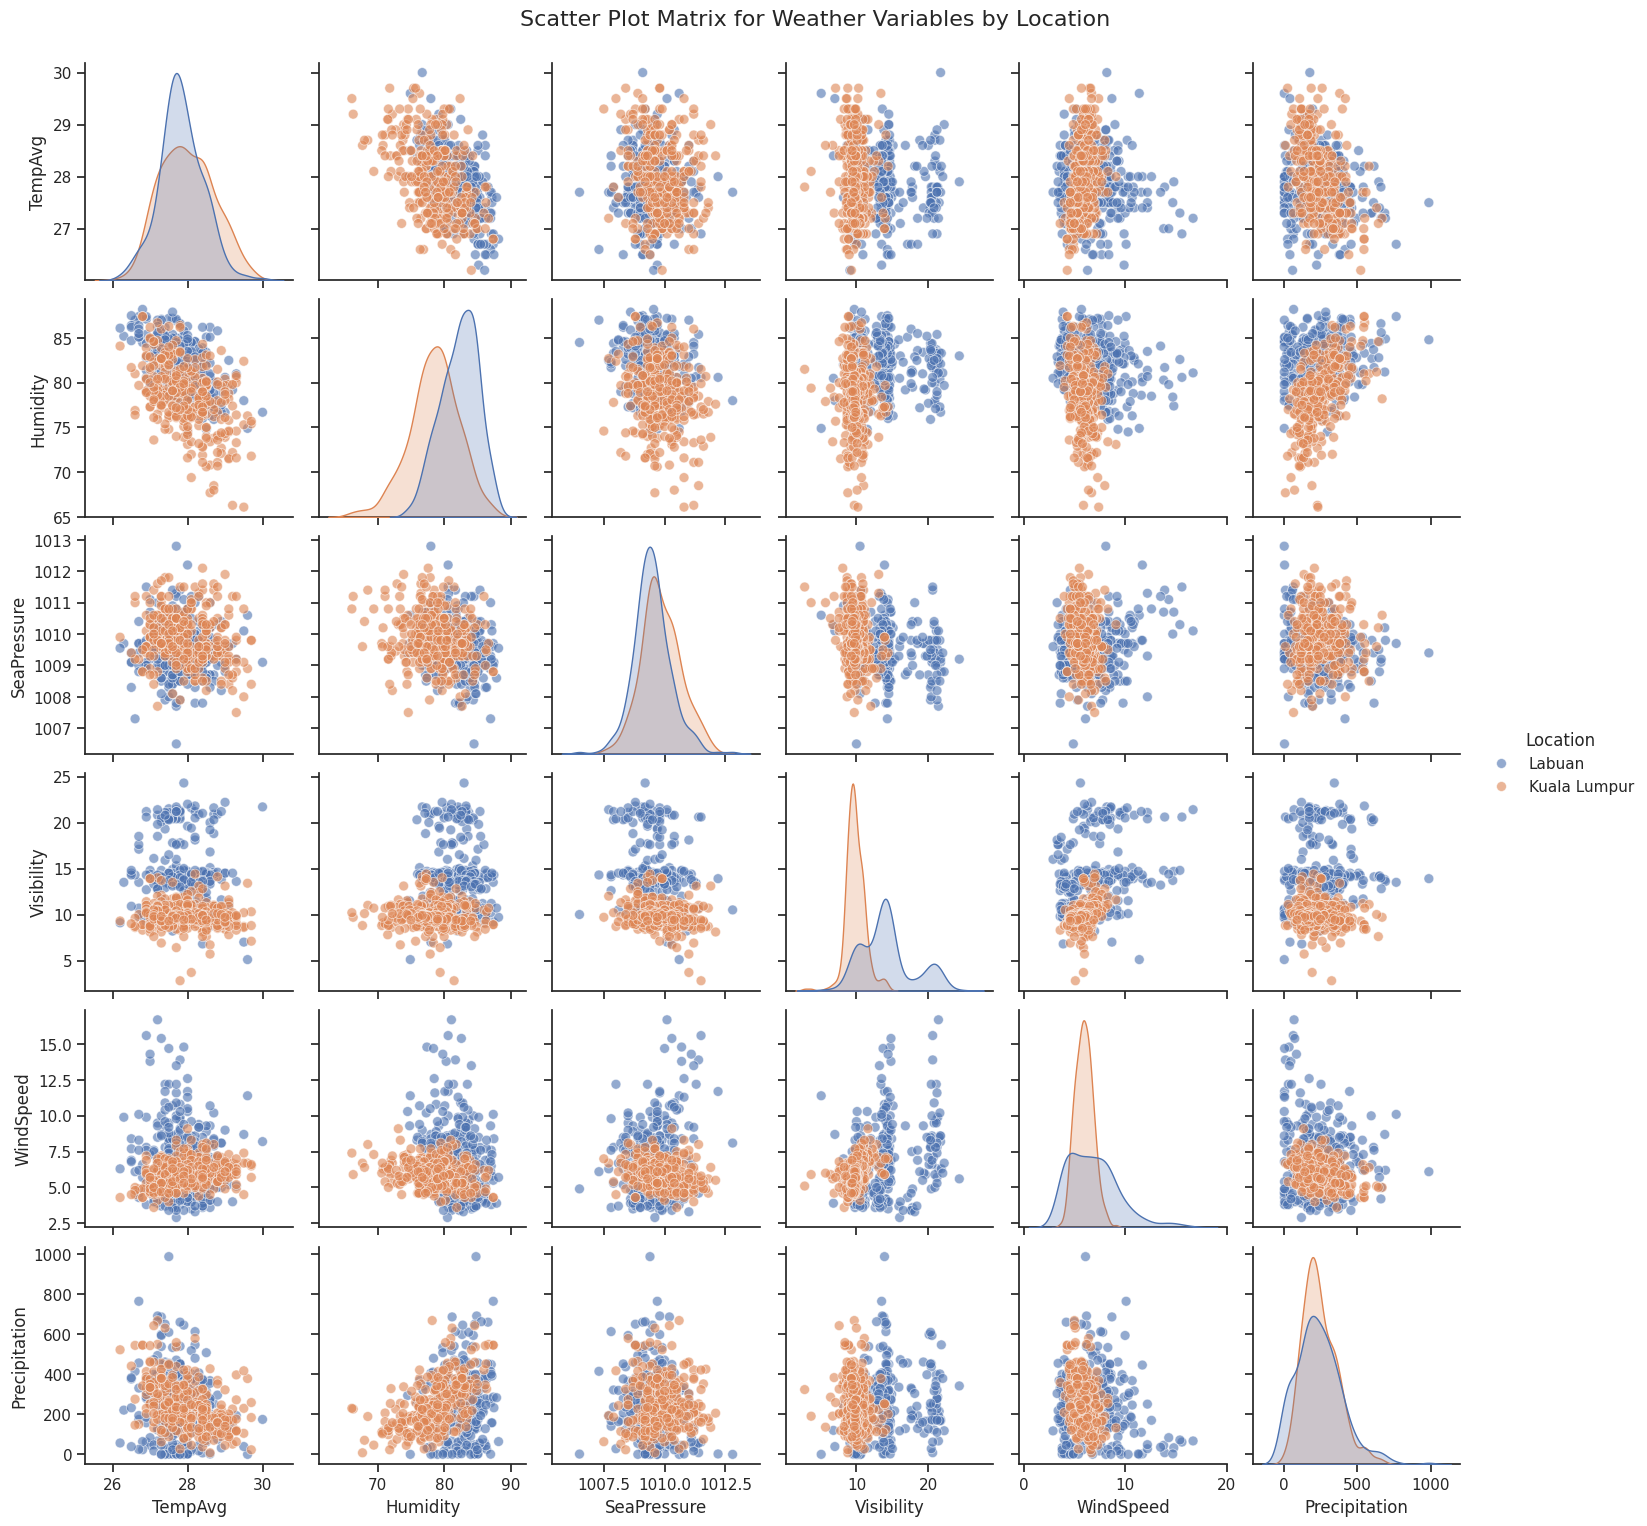

In [ ]:
# Select numerical columns for scatter plot matrix
selected_columns = ['TempAvg', 'Humidity', 'SeaPressure', 'Visibility', 'WindSpeed', 'Precipitation']

# Create pair plot (scatter plot matrix) with hue for location
sns.set(style="ticks")
pairplot = sns.pairplot(
    df[selected_columns + ['Location']],  # Include 'Location' column
    hue='Location',  # Different colors for each location
    diag_kind="kde",  # Kernel density estimation for diagonals
    plot_kws={'alpha': 0.6, 's': 50}  # Custom scatter point transparency and size
)

# Add title
pairplot.fig.suptitle("Scatter Plot Matrix for Weather Variables by Location", y=1.02, fontsize=16)

# Show the plot
plt.show()

Inisghts:

1. Temperature (TempAvg)
* Both Labuan and Kuala Lumpur exhibit a similar average temperature distribution, with most values between 27°C and 30°C.
* Slightly tighter clustering of temperature in Kuala Lumpur indicates more consistent temperature patterns compared to Labuan.
2. Humidity
* Labuan shows slightly higher humidity values overall compared to Kuala Lumpur, but the distributions overlap significantly.
* Humidity is relatively uniform across both locations, with most values between 70% and 90%.
3. Sea Pressure
* Kuala Lumpur has a tighter distribution of sea-level pressure, centered around 1010–1011 hPa.
* Labuan exhibits a wider spread in sea-level pressure values, indicating more variability.
4. Visibility
* Visibility in Kuala Lumpur is generally higher than in Labuan.
* Kuala Lumpur shows a clustering of values around 8–10 km, while Labuan has a wider spread with lower visibility values, suggesting more frequent instances of reduced visibility.
5. Wind Speed
* Labuan experiences a broader range of wind speeds compared to Kuala Lumpur, with more instances of higher wind speeds (up to 20 km/h).
* Kuala Lumpur has lower wind speeds overall, clustering below 10 km/h.
6. Precipitation
* Precipitation is generally higher in Kuala Lumpur than in Labuan, as evident from the spread of points.
The scatter plots show an inverse relationship between precipitation and visibility in both locations, suggesting that higher precipitation reduces visibility.
* Precipitation and wind speed also show a positive trend in Labuan, indicating windier conditions during heavy rainfall.
7. Relationships Between Variables
* Temperature and Precipitation:
Both locations exhibit a slight negative correlation between average temperature and precipitation, indicating cooler temperatures during heavy rainfall.
* Humidity and Precipitation:
A positive relationship exists between humidity and precipitation in both locations, as higher humidity often coincides with rainfall.
* Sea Pressure and Precipitation:
An inverse relationship is observed, with lower sea-level pressure often associated with higher precipitation.
8. Location-Specific Insights
* Labuan:
More variability in weather parameters such as sea pressure, wind speed, and precipitation suggests more dynamic weather conditions.
* Kuala Lumpur:
More consistent weather patterns, with higher visibility and less variation in sea pressure and wind speed.

**Relationship of monthly precipitation and other variables**

In [ ]:
# Define a function to create interactive scatter plots with a trendline for each location
def plot_interactive_relationship(x, y, xlabel, ylabel, title):
    # Create scatter plot for Labuan data
    fig_labuan = px.scatter(
        df[df['Location'] == 'Labuan'],
        x=x,
        y=y,
        color='Location',  # Color for Labuan
        trendline="ols",  # Ordinary Least Squares trendline
        title=f'{title} - Labuan',
        labels={x: xlabel, y: ylabel, 'Location': 'Location'},
        hover_data=['Year', 'Month']
    )

    # Create scatter plot for Kuala Lumpur data
    fig_kl = px.scatter(
        df[df['Location'] == 'Kuala Lumpur'],
        x=x,
        y=y,
        color_discrete_sequence=['red'],
        color='Location',  # Color for Kuala Lumpur
        trendline="ols",  # Ordinary Least Squares trendline
        title=f'{title} - Kuala Lumpur',
        labels={x: xlabel, y: ylabel, 'Location': 'Location'},
        hover_data=['Year', 'Month']
    )

    # Update layout for Labuan plot
    fig_labuan.update_layout(
        title_font_size=18,
        xaxis_title_font_size=14,
        yaxis_title_font_size=14,
        hoverlabel=dict(font_size=12),
        template="plotly_white",
        width=800,
        height=500
    )

    # Update layout for Kuala Lumpur plot
    fig_kl.update_layout(
        title_font_size=18,
        xaxis_title_font_size=14,
        yaxis_title_font_size=14,
        hoverlabel=dict(font_size=12),
        template="plotly_white",
        width=800,
        height=500
    )

    # Show the plots
    fig_labuan.show()
    fig_kl.show()

# 1. TempAvg vs Monthly Precipitation
plot_interactive_relationship(
    x='TempAvg',
    y='Precipitation',
    xlabel='Average Temperature (°C)',
    ylabel='Monthly Precipitation (mm)',
    title='TempAvg vs Monthly Precipitation'
)

# 2. Humidity vs Monthly Precipitation
plot_interactive_relationship(
    x='Humidity',
    y='Precipitation',
    xlabel='Humidity (%)',
    ylabel='Monthly Precipitation (mm)',
    title='Humidity vs Monthly Precipitation'
)

# 3. Sea Pressure vs Monthly Precipitation
plot_interactive_relationship(
    x='SeaPressure',
    y='Precipitation',
    xlabel='Sea Pressure (hPa)',
    ylabel='Monthly Precipitation (mm)',
    title='Sea Pressure vs Monthly Precipitation'
)

# 4. Visibility vs Monthly Precipitation
plot_interactive_relationship(
    x='Visibility',
    y='Precipitation',
    xlabel='Visibility (km)',
    ylabel='Monthly Precipitation (mm)',
    title='Visibility vs Monthly Precipitation'
)

# 5. Wind Speed vs Monthly Precipitation
plot_interactive_relationship(
    x='WindSpeed',
    y='Precipitation',
    xlabel='Wind Speed (m/s)',
    ylabel='Monthly Precipitation (mm)',
    title='Wind Speed vs Monthly Precipitation'
)


Insights:

1. TempAvg vs Monthly Precipitation
* A slight negative correlation between average temperature and precipitation. As temperature increases, precipitation tends to decrease.
* Labuan: Exhibits higher precipitation at slightly lower temperatures (~27°C).
* Kuala Lumpur: Shows a similar trend but with a more consistent temperature range (~27-29°C).
* Cooler temperatures may coincide with increased rainfall, potentially due to cloud cover or specific monsoonal conditions.

2. Humidity vs Monthly Precipitation
* A positive correlation between humidity and precipitation. Higher humidity is often associated with increased rainfall.
* Labuan: Shows a steeper increase in precipitation with rising humidity.
* Kuala Lumpur: Has a flatter trendline, indicating a weaker relationship between humidity and precipitation.
* Humidity is a significant predictor of rainfall, especially in Labuan, suggesting stronger tropical or coastal effects.

3. Sea Pressure vs Monthly Precipitation
* A slight negative correlation between sea pressure and precipitation. Lower pressure is often associated with higher precipitation.
* Labuan: Shows more variability in sea pressure and precipitation, with a wider spread of data points.
* Kuala Lumpur: Displays a narrower range of sea pressure values, indicating more consistent.
* Low-pressure systems are linked to heavier rainfall.

4. Visibility vs Monthly Precipitation
* A weak negative correlation. As precipitation increases, visibility tends to decrease slightly.
* Labuan: Shows a wider range of visibility values during rainfall, suggesting more diverse weather conditions (e.g., storms, heavy rain).
* Kuala Lumpur: Maintains relatively stable visibility, even with varying precipitation levels.
* Heavy rainfall reduces visibility, particularly in coastal regions like Labuan.

5. Wind Speed vs Monthly Precipitation
* A slight negative correlation. Higher wind speeds are associated with lower precipitation levels.
* Labuan: Exhibits higher wind speeds (up to 16 m/s) and a broader spread in precipitation, indicating dynamic weather conditions.
* Kuala Lumpur: Generally lower wind speeds, with a more concentrated precipitation range.
* Labuan's coastal location likely experiences stronger winds, which may be less conducive to steady rainfall.

Overall:

* Labuan shows more variability across all variables, suggesting dynamic weather patterns influenced by its coastal location.
* Kuala Lumpur has more stable weather conditions, with tighter clusters and less variability in the relationships.


**Correlation Analysis**

The main goal of correlation analysis is to identify whether changes in one variable are associated with changes in another variable, and how strong that association is.

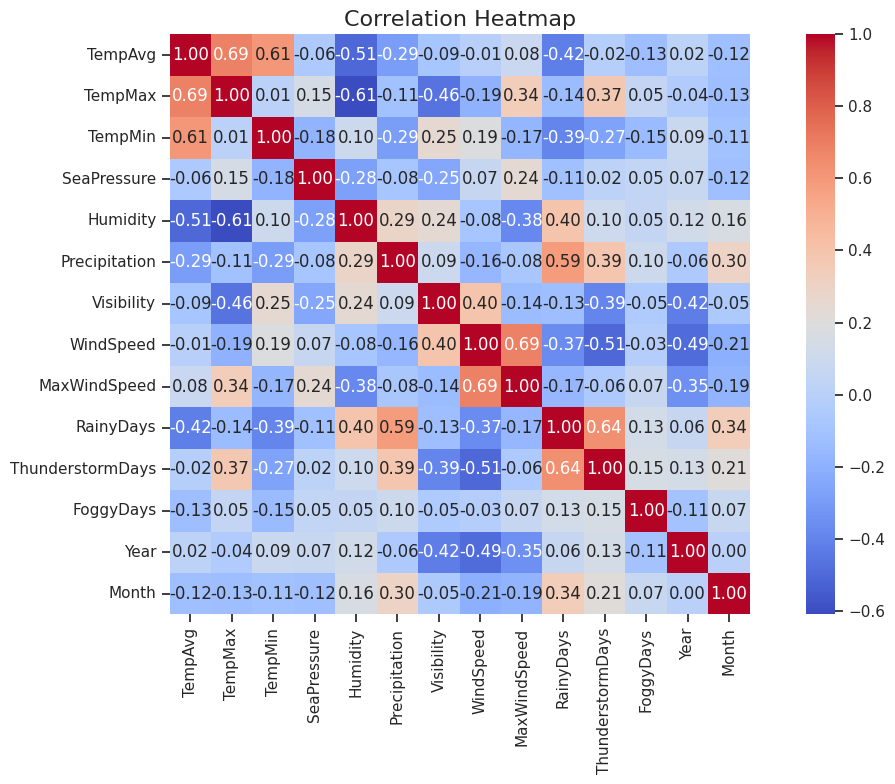

In [ ]:
# Drop non-numeric columns
numeric_data = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Generate a heatmap of the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

# Add a title for clarity
plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()


**Insight:**

**Strong Positive Correlations:**

* TempAvg and TempMax (0.69):
Indicates that higher average temperatures strongly correspond to higher maximum temperatures.
* MaxWindSpeed and WindSpeed (0.69):
Suggests that higher average wind speeds are associated with higher maximum wind speeds.
* RainyDays and Precipitation (0.56):
A moderately strong relationship where more rainy days tend to bring higher precipitation levels.
* ThunderstormDays and RainyDays (0.64):
Thunderstorm days strongly correlate with the number of rainy days, suggesting that thunderstorms contribute significantly to rainfall.

**Strong Negative Correlations:**
* Visibility and Precipitation (-0.42):
Indicates that higher precipitation is associated with lower visibility, which makes sense as rain or fog tends to obscure vision.
* Visibility and RainyDays (-0.37):
Suggests that increased rainy days are linked to reduced visibility.

**Key Relationships for Precipitation Analysis:**

* Positively Correlated: RainyDays, ThunderstormDays.
* Negatively Correlated: Visibility, FoggyDays.
* Insight: More rainy days and thunderstorms significantly contribute to precipitation, while high precipitation reduces visibility.


Based on the correlation heatmap, columns with redundant value or low correlation with precipitation will be dropped:

* TempMax
* TempMin
* MaxWindSpeed
* SeaPressure
* FoggyDays

In [ ]:
# Define columns to drop
columns_to_drop = ['TempMax', 'TempMin', 'MaxWindSpeed','SeaPressure', 'FoggyDays']

# Drop the columns
df_new = df.drop(columns=columns_to_drop)

# Verify the columns were dropped
print(df_new.head())

  Location        Date  TempAvg  Humidity  Precipitation  Visibility  \
0   Labuan  1998-01-01     27.8      81.7           8.13        20.6   
1   Labuan  1998-02-01     28.0      80.6           2.03        13.9   
2   Labuan  1998-03-01     29.6      74.9           0.00         5.1   
3   Labuan  1998-04-01     29.5      78.0          39.11         7.0   
4   Labuan  1998-05-01     30.0      76.7         174.75        21.7   

   WindSpeed  RainyDays  ThunderstormDays  Year  Month PrecipitationType  \
0       13.9        1.0               0.0  1998      1            Cloudy   
1       11.7        2.0               1.0  1998      2            Cloudy   
2       11.4        0.0               0.0  1998      3            Cloudy   
3        8.7        3.0               5.0  1998      4             Light   
4        8.2        9.0              10.0  1998      5          Moderate   

              Season  
0  Northeast Monsoon  
1  Northeast Monsoon  
2  Northeast Monsoon  
3      Inter-monso

**Feature Extraction**

The feature extraction methods used here involve creating new interaction and aggregation features to capture additional information or patterns in the data, which can be valuable for machine learning models.

In [ ]:
#added new terms

df_new['TempAvg_Humidity_Interaction'] = df_new['TempAvg'] * df_new['Humidity']
df_new['RainyThunderstorm_Interaction'] = df_new['RainyDays'] * df_new['ThunderstormDays']
df_new['Humidity_Precipitation_Interaction'] = df_new['Humidity'] * df_new['Precipitation']
df_new['Visibility_WindSpeed_Interaction'] = df_new['Visibility'] * df_new['WindSpeed']
df_new['Month_Precipitation_Interaction'] = df_new['Month'] * df_new['Precipitation']
df_new['MonthlyAvgTemp'] = df_new.groupby('Month')['TempAvg'].transform('mean')
df_new['SeasonalAvgPrecip'] = df_new.groupby('Season')['Precipitation'].transform('mean')

In [ ]:
# Verify the columns after new interaction terms are added
print(df_new.head())

  Location        Date  TempAvg  Humidity  Precipitation  Visibility  \
0   Labuan  1998-01-01     27.8      81.7           8.13        20.6   
1   Labuan  1998-02-01     28.0      80.6           2.03        13.9   
2   Labuan  1998-03-01     29.6      74.9           0.00         5.1   
3   Labuan  1998-04-01     29.5      78.0          39.11         7.0   
4   Labuan  1998-05-01     30.0      76.7         174.75        21.7   

   WindSpeed  RainyDays  ThunderstormDays  Year  Month PrecipitationType  \
0       13.9        1.0               0.0  1998      1            Cloudy   
1       11.7        2.0               1.0  1998      2            Cloudy   
2       11.4        0.0               0.0  1998      3            Cloudy   
3        8.7        3.0               5.0  1998      4             Light   
4        8.2        9.0              10.0  1998      5          Moderate   

              Season  TempAvg_Humidity_Interaction  \
0  Northeast Monsoon                       2271.26   
1 

## 2.4 Data Modelling

In machine learning, data modeling is a structured process that transforms raw data into a trained model capable of making predictions.
 In this project, Random Forest, Linear Regression, and Gradient Boosting are utilized to predict monthly and yearly precipitation. Their performance will be evaluated to identify the most suitable model.


In [ ]:
# Import Libraries
import random

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, cross_val_score

**2.4.2 Perform One-Hot Encoding for columns containing categorical (string) values**

One-hot encoding is a technique used to transform categorical data into a format that can be provided to machine learning models. It works by converting each unique category in a column into a separate binary column (0 or 1).

Main reasons for selecting One-Hot Encoding:

1) No Assumption of Ordinality, avoids implying an order or magnitude between categories.

2) Each category is treated independently, preventing models from making incorrect assumptions about relationships between categories.



In [ ]:
# One-Hot Encoding for columns containing categorical (string) values
# Location, Season and Precipitation Type

# Specify the columns to one-hot encode
columns_to_encode = ['Location', 'Season', 'PrecipitationType']

# Perform one-hot encoding
df = pd.get_dummies(df_new, columns=columns_to_encode, prefix=columns_to_encode)

# Display the updated DataFrame
print(df)

           Date  TempAvg  Humidity  Precipitation  Visibility  WindSpeed  \
0    1998-01-01     27.8      81.7           8.13        20.6       13.9   
1    1998-02-01     28.0      80.6           2.03        13.9       11.7   
2    1998-03-01     29.6      74.9           0.00         5.1       11.4   
3    1998-04-01     29.5      78.0          39.11         7.0        8.7   
4    1998-05-01     30.0      76.7         174.75        21.7        8.2   
..          ...      ...       ...            ...         ...        ...   
619  2023-08-01     28.1      79.0         248.15         9.5        5.6   
620  2023-09-01     28.5      75.0          87.89         9.4        6.9   
621  2023-10-01     27.9      79.9         421.61         8.5        5.8   
622  2023-11-01     27.9      81.8         346.71         9.4        5.3   
623  2023-12-01     27.5      84.0         448.30         9.3        4.6   

     RainyDays  ThunderstormDays  Year  Month  ...  Location_Labuan  \
0          1.0  

**2.4.3 Split into Training Dataset (80%) and Testing Dataset (20%)**

The data will be segmented by month and year, with training and testing datasets split into 80% and 20%, respectively.

The decision to split the data by month and year was driven by their distinct purposes across different time scales. Monthly data captures short-term variations in precipitation, providing granular insights, while yearly data represents longer periods, offering a clearer view of long-term trends. Moreover, this approach accounts for differences in model performance, as some models are better suited to yearly datasets, whereas others excel with monthly datasets due to their ability to handle high-resolution data or align with specific methodological requirements.

Before spliting, data was shuffled to avoid bias: If the data is ordered, models trained on unshuffled data may learn patterns that don't generalize well to unseen data. Ensuring Randomness in Splits: When splitting data into training and testing sets, shuffling ensures that both sets represent the overall data distribution.

**2.4.3 (a) Monthly Dataset Splitting**

In [ ]:
# shuffle the data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
# drop the year column
df_month = df.drop('Year', axis=1)

# drop date column
df_month = df_month.drop('Date', axis=1)


# Split into X = features and Y = target
X_month = df_month.drop('Precipitation', axis=1)
y_month = df_month['Precipitation']


In [ ]:
# Split into train and test sets (80% train, 20% test) [monthly dataset]
X_month_train, X_month_test, y_month_train, y_month_test = train_test_split(X_month, y_month, test_size=0.2, random_state=42)

print("Training set size:", X_month_train.shape)
print("Testing set size:", X_month_test.shape)

Training set size: (499, 25)
Testing set size: (125, 25)


After splitting the dataset, the training set consists of 499 rows and 25 columns, while the testing set comprises 125 rows and 25 columns. This aligns with the original dataset of 624 rows, where 80% (499 rows) was allocated to training and 20% (125 rows) to testing. Initially, the dataset had 28 columns, but it now includes 25 columns after dropping 2 feature columns(Date and Year) and 1 target column (Precipitation).

**2.4.3 (b) Yearly Dataset Splitting**

In [ ]:
# drop the Month column
data_year = df.drop('Month', axis=1)

# drop date column
data_year = data_year.drop('Date', axis=1)

# Split into X = features and Y = target
X_year = data_year.drop('Precipitation', axis=1)
y_year = data_year['Precipitation']


In [ ]:
# Split into train and test sets (80% train, 20% test) [yearly dataset]
X_year_train, X_year_test, y_year_train, y_year_test = train_test_split(X_year, y_year, test_size=0.2, random_state=42)

print("Training set size:", X_year_train.shape)
print("Testing set size:", X_year_test.shape)

Training set size: (499, 25)
Testing set size: (125, 25)


[Similar to Monthly Dataset Splitting]

After splitting the dataset, the training set consists of 499 rows and 25 columns, while the testing set comprises 125 rows and 25 columns. This aligns with the original dataset of 624 rows, where 80% (499 rows) was allocated to training and 20% (125 rows) to testing. Initially, the dataset had 28 columns, but it now includes 25 columns after dropping 2 feature columns (Date and Month) and 1 target column (Precipitation).




**2.4.4 Training and evaluation**



**Define model to use - Random Forest, Linear Regression, and Gradient Boosting**

The goal is to predict precipitation, a numerical value, hence regression models are employed. Models such as Random Forest, Gradient Boosting, and Linear Regression are used to forecast these values.

**Random Forest**: A Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting.

**Gradient Boosting**: Gradient Boosting is another ensemble method that builds decision trees sequentially, where each tree corrects the errors of the previous one. It focuses on improving model accuracy by giving more weight to misclassified data points.

**Linear Regression**: Linear Regression is a simple statistical model that assumes a linear relationship between the input features and the target variable. It predicts the target variable (in this case, precipitation) based on a weighted sum of the input features.



In [ ]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}


**Define metrics to use**

As this is a regression model, MAE, MSE, RMSE, and R² were used to evaluate its performance. These metrics provide insights into the model's accuracy, error magnitude, and ability to explain the variability in the target variable.

i) MAE (Mean Absolute Error): The average of all the absolute differences between predicted and actual values.
  
ii) MSE (Mean Squared Error): The average of the squared differences between predicted and actual values, giving more weight to larger errors.

iii) RMSE (Root Mean Squared Error): The square root of MSE, showing the average error in the same units as the target.

iv) R² (R-Squared): The percentage of the target variable's variation that the model explains, with higher values showing a better fit.

In [ ]:
results = {model_name: {"MAE": [], "MSE": [], "RMSE": [], "R²": []} for model_name in models}

**2.4.4 (a) Monthly Dataset Training and Evaluation**

In [ ]:
month_predictions = {}

for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...\n")

    # Reset fold-specific metrics for each model
    mae_scores = []
    mse_scores = []
    rmse_scores = []
    r2_scores = []

    # Train the model
    model.fit(X_month_train, y_month_train)

    # Predict
    y_pred = model.predict(X_month_test)
    month_predictions[model_name] = y_pred

    # Calculate MAE, MSE, RMSE, and R²
    mae = mean_absolute_error(y_month_test, y_pred)
    mse = mean_squared_error(y_month_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_month_test, y_pred)

    # Store results
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

    # Output results for the current fold
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")

    # Calculate and store the average of each metric
    results[model_name]["MAE"] = np.mean(mae_scores)
    results[model_name]["MSE"] = np.mean(mse_scores)
    results[model_name]["RMSE"] = np.mean(rmse_scores)
    results[model_name]["R²"] = np.mean(r2_scores)


Evaluating Linear Regression...

MAE: 3.8329
MSE: 32.9927
RMSE: 5.7439
R²: 0.9979

Evaluating Random Forest...

MAE: 5.5114
MSE: 66.2078
RMSE: 8.1368
R²: 0.9957

Evaluating Gradient Boosting...

MAE: 3.8332
MSE: 28.1768
RMSE: 5.3082
R²: 0.9982


**Key Findings**

**Best Performance in monthly precipitation prediction:**

Gradient Boosting performs the best with the lowest MSE (28.2307), RMSE (5.3133) and highest R² (0.9982), followed by Linear Regression, and then Random Forest.

Although Gradient Boosting has a slightly higher MAE than Linear Regression, it achieves better results overall in terms of MSE, RMSE, and R².

**2.4.4 (b) Yearly Dataset Training and Evaluation**

In [ ]:
year_predictions = {}

for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...\n")

    # Reset fold-specific metrics for each model
    mae_scores = []
    mse_scores = []
    rmse_scores = []
    r2_scores = []

    # Train the model
    model.fit(X_year_train, y_year_train)

    # Predict
    y_pred = model.predict(X_year_test)
    year_predictions[model_name] = y_pred

    # Calculate MAE, MSE, RMSE, and R²
    mae = mean_absolute_error(y_year_test, y_pred)
    mse = mean_squared_error(y_year_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_year_test, y_pred)

    # Store results
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

    # Output results for the current fold
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")

    # Calculate and store the average of each metric
    results[model_name]["MAE"] = np.mean(mae_scores)
    results[model_name]["MSE"] = np.mean(mse_scores)
    results[model_name]["RMSE"] = np.mean(rmse_scores)
    results[model_name]["R²"] = np.mean(r2_scores)


Evaluating Linear Regression...

MAE: 3.8539
MSE: 33.3419
RMSE: 5.7742
R²: 0.9978

Evaluating Random Forest...

MAE: 5.4318
MSE: 64.4362
RMSE: 8.0272
R²: 0.9958

Evaluating Gradient Boosting...

MAE: 3.8345
MSE: 28.4130
RMSE: 5.3304
R²: 0.9982


**Key Findings**

**Best Performance in yearly precipitation prediction:**

Similar to the monthly precipitation prediction, Gradient Boosting performs the best with the lowest MSE, RMSE and highest R² , followed by Linear Regression, and then Random Forest. Furthermore, it also outperforms the other models with the lowest MAE, a contrast to the results in the monthly precipitation prediction, where Linear Regression exhibited the lowest MAE

**Summary: Comparison between Monthly and Yearly Datasets:**

Best Performance in Both Datasets: Gradient Boosting consistently outperforms the other models across both datasets, with the lowest MSE and RMSE, and highest R².


The potential differences in MAE between monthly and yearly predictions:

Monthly predictions are often more influenced by short-term seasonal variations. These fluctuations can lead to higher MAE for monthly predictions because the model has to account for finer-grained patterns. For yearly predictions, the model may smooth out short-term fluctuations, making the overall trend more predictable. As a result, the MAE for yearly predictions could be lower because the model captures long-term trends rather than short-term variations.

Linear Regression and Random Forest are still competitive but show slightly less accuracy in terms of MSE, RMSE, and R², with Random Forest slightly lagging in both datasets.

**2.4.5 Visualise model Prediction**

In [ ]:
month_linear_regression_list = month_predictions['Linear Regression'].tolist()
month_random_forest_list = month_predictions['Random Forest'].tolist()
month_gradient_boosting_list = month_predictions['Gradient Boosting'].tolist()

In [ ]:
data_month_linear_regression = {
    'Month': X_month_test['Month'],
    'Actual': y_month_test,
    'Predicted': month_linear_regression_list
}

data_month_random_forest = {
    'Month': X_month_test['Month'],
    'Actual': y_month_test,
    'Predicted': month_random_forest_list
}

data_month_gradient_boosting = {
    'Month': X_month_test['Month'],
    'Actual': y_month_test,
    'Predicted': month_gradient_boosting_list
}

df_month_final_linear_regression = pd.DataFrame(data_month_linear_regression)
df_month_final_random_forest = pd.DataFrame(data_month_random_forest)
df_month_final_gradient_boosting = pd.DataFrame(data_month_gradient_boosting)

print(df_month_final_linear_regression)

     Month  Actual   Predicted
446      6    2.28   -2.550064
496      9  340.12  336.339756
215      2  181.87  180.611131
212      1  258.08  257.993403
479      9  379.47  373.820272
..     ...     ...         ...
140     10  151.88  150.922408
344      3  151.39  154.824067
228      1  306.60  311.821537
411     12  350.26  351.696273
188      1   17.02   18.217511

[125 rows x 3 columns]


In [ ]:
# Calculate mean of the Actual and Predicted value based on distinct month
df_month_final_linear_regression = df_month_final_linear_regression.groupby('Month')[['Actual', 'Predicted']].mean()
df_month_final_linear_regression.reset_index(inplace=True)
print(df_month_final_linear_regression)

df_month_final_random_forest = df_month_final_random_forest.groupby('Month')[['Actual', 'Predicted']].mean()
df_month_final_random_forest.reset_index(inplace=True)

df_month_final_gradient_boosting = df_month_final_gradient_boosting.groupby('Month')[['Actual', 'Predicted']].mean()
df_month_final_gradient_boosting.reset_index(inplace=True)

    Month      Actual   Predicted
0       1  232.431667  230.917625
1       2  161.722000  158.363498
2       3  221.457778  217.190823
3       4  202.543182  201.247419
4       5  197.859091  194.704545
5       6  198.429500  198.525139
6       7  173.056500  172.903464
7       8  145.495000  148.531074
8       9  308.513636  304.846245
9      10  307.901154  306.964225
10     11  335.017308  333.933800
11     12  306.883000  307.059821


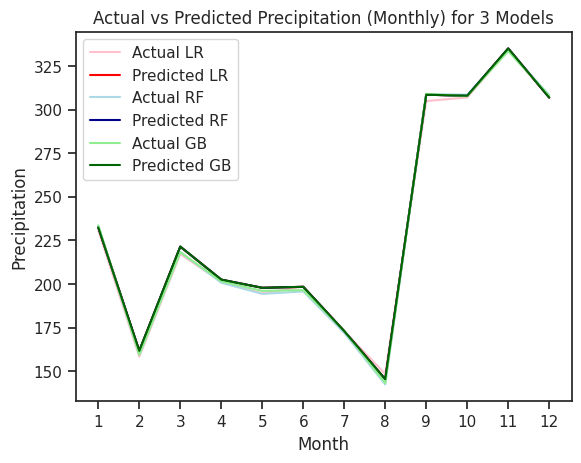

In [ ]:
# Plot actual vs predicted for each model
plt.plot(df_month_final_linear_regression['Month'],df_month_final_linear_regression['Predicted'], color='pink', label='Actual LR')
plt.plot(df_month_final_linear_regression['Month'],df_month_final_linear_regression['Actual'], color='red', label='Predicted LR')

plt.plot(df_month_final_random_forest['Month'],df_month_final_random_forest['Predicted'], color='lightblue', label='Actual RF')
plt.plot(df_month_final_random_forest['Month'],df_month_final_random_forest['Actual'], color='darkblue', label='Predicted RF')

plt.plot(df_month_final_gradient_boosting['Month'],df_month_final_gradient_boosting['Predicted'], color='lightgreen', label='Actual GB')
plt.plot(df_month_final_gradient_boosting['Month'],df_month_final_gradient_boosting['Actual'], color='darkgreen', label='Predicted GB')


# Add labels and title
plt.xlabel('Month')  # Label for the x-axis
plt.ylabel('Precipitation')
plt.title('Actual vs Predicted Precipitation (Monthly) for 3 Models')

# Set custom x-axis tick labels (assuming 'Month' is categorical or has month names)
plt.xticks(ticks=df_month_final_linear_regression['Month'], labels=df_month_final_linear_regression['Month'], rotation=0)

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
year_linear_regression_list = year_predictions['Linear Regression'].tolist()
year_random_forest_list = year_predictions['Random Forest'].tolist()
year_gradient_boosting_list = year_predictions['Gradient Boosting'].tolist()

In [ ]:
data_year_linear_regression = {
    'Year': X_year_test['Year'],
    'Actual': y_year_test,
    'Predicted': year_linear_regression_list
}

data_year_random_forest = {
    'Year': X_year_test['Year'],
    'Actual': y_year_test,
    'Predicted': year_random_forest_list
}

data_year_gradient_boosting = {
    'Year': X_year_test['Year'],
    'Actual': y_year_test,
    'Predicted': year_gradient_boosting_list
}

df_year_final_linear_regression = pd.DataFrame(data_year_linear_regression)
df_year_final_random_forest = pd.DataFrame(data_year_random_forest)
df_year_final_gradient_boosting = pd.DataFrame(data_year_gradient_boosting)

print(df_year_final_linear_regression)

     Year  Actual   Predicted
446  2017    2.28   -2.686724
496  2020  340.12  336.128221
215  2019  181.87  180.405906
212  2010  258.08  257.867237
479  2001  379.47  373.711814
..    ...     ...         ...
140  2012  151.88  151.065926
344  2004  151.39  154.861838
228  2007  306.60  311.796354
411  2014  350.26  351.758133
188  2015   17.02   17.598467

[125 rows x 3 columns]


In [ ]:
# Calculate mean of the Actual and Predicted value based on distinct year
df_year_final_linear_regression = df_year_final_linear_regression.groupby('Year')[['Actual', 'Predicted']].mean()
df_year_final_linear_regression.reset_index(inplace=True)
print(df_year_final_linear_regression)

df_year_final_random_forest = df_year_final_random_forest.groupby('Year')[['Actual', 'Predicted']].mean()
df_year_final_random_forest.reset_index(inplace=True)

df_year_final_gradient_boosting = df_year_final_gradient_boosting.groupby('Year')[['Actual', 'Predicted']].mean()
df_year_final_gradient_boosting.reset_index(inplace=True)

    Year      Actual   Predicted
0   1998  254.801667  248.887991
1   1999  219.086667  218.560840
2   2000  222.756667  221.591131
3   2001  317.740000  313.700902
4   2002  265.945000  264.975471
5   2003  266.168750  265.031323
6   2004  234.830000  235.583374
7   2005  191.412857  184.398065
8   2006  268.736000  266.509077
9   2007  277.793333  278.897632
10  2008  278.543333  277.244792
11  2009  202.440000  204.121376
12  2010  369.420000  372.378014
13  2011  270.470000  271.412192
14  2012  151.880000  151.065926
15  2013  196.720000  197.293830
16  2014  329.371250  329.702703
17  2015  141.480000  145.374665
18  2016  293.752500  291.194917
19  2017  185.800000  183.959826
20  2018   57.320000   49.082255
21  2019  227.649167  227.411510
22  2020  251.605714  250.702676
23  2021  222.895000  219.962699
24  2022  192.790000  191.241570
25  2023  295.330909  292.221211


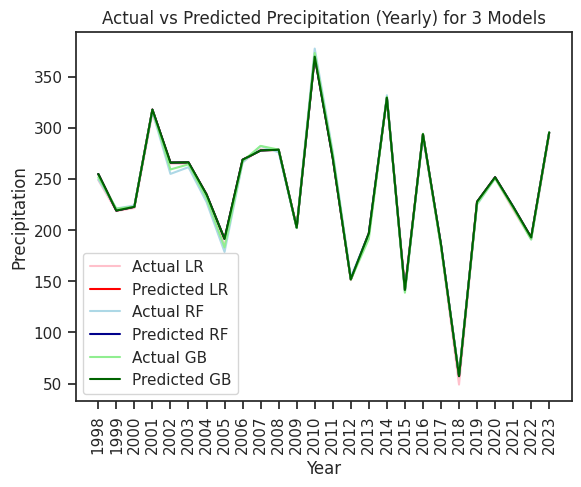

In [ ]:
# Plot actual vs predicted for each model
plt.plot(df_year_final_linear_regression['Year'],df_year_final_linear_regression['Predicted'], color='pink', label='Actual LR')
plt.plot(df_year_final_linear_regression['Year'],df_year_final_linear_regression['Actual'], color='red', label='Predicted LR')

plt.plot(df_year_final_random_forest['Year'],df_year_final_random_forest['Predicted'], color='lightblue', label='Actual RF')
plt.plot(df_year_final_random_forest['Year'],df_year_final_random_forest['Actual'], color='darkblue', label='Predicted RF')

plt.plot(df_year_final_gradient_boosting['Year'],df_year_final_gradient_boosting['Predicted'], color='lightgreen', label='Actual GB')
plt.plot(df_year_final_gradient_boosting['Year'],df_year_final_gradient_boosting['Actual'], color='darkgreen', label='Predicted GB')


# Add labels and title
plt.xlabel('Year')  # Label for the x-axis
plt.ylabel('Precipitation')
plt.title('Actual vs Predicted Precipitation (Yearly) for 3 Models')

# Set custom x-axis tick labels (assuming 'Year' is categorical or has year names)
plt.xticks(ticks=df_year_final_linear_regression['Year'], labels=df_year_final_linear_regression['Year'], rotation=90)

# Add a legend
plt.legend()

# Show the plot
plt.show()

Both graphs show that the predicted vs. actual values (for both monthly and yearly data) are nearly perfect. While this may seem positive, it also raises concerns about potential overfitting. Therefore, we decided to implement k-fold cross-validation to ensure the model's robustness and generalizability

**2.4.6 To apply K-fold cross validation for better model evaluation on both monthly and yearly dataset**

To obtain a more robust evaluation of the model, K-fold cross-validation was used to ensure it generalizes well to real-world unseen data and maximizes the use of available data, especially when the dataset is small.

In [ ]:
# Define k-fold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

**2.4.6 (a) Application of K-fold cross validation on monthly dataset**

In [ ]:
# Define models
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...\n")

    # Reset fold-specific metrics for each model
    mae_scores = []
    mse_scores = []
    rmse_scores = []
    r2_scores = []
    kFold_month_predictions = []

    fold = 1
    for train_index, test_index in kf.split(df_month):
        X_train, X_test = X_month.iloc[train_index], X_month.iloc[test_index]
        y_train, y_test = y_month.iloc[train_index], y_month.iloc[test_index]

        # Train the model
        model.fit(X_train, y_train)

        # Predict
        y_pred = model.predict(X_test)

        # Calculate MAE, MSE, RMSE, and R²
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Store results
        mae_scores.append(mae)
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(r2)
        kFold_month_predictions.append(y_pred)

        # Output results for the current fold
        print(f"Fold {fold} Results:")
        print(f"MAE: {mae:.4f}")
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"R²: {r2:.4f}")

        fold += 1

    # Calculate and store the average of each metric
    results[model_name]["MAE"] = np.mean(mae_scores)
    results[model_name]["MSE"] = np.mean(mse_scores)
    results[model_name]["RMSE"] = np.mean(rmse_scores)
    results[model_name]["R²"] = np.mean(r2_scores)

# Display average results for all models
print("\nAverage Results for All Models:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"Average MAE: {metrics['MAE']:.4f}")
    print(f"Average MSE: {metrics['MSE']:.4f}")
    print(f"Average RMSE: {metrics['RMSE']:.4f}")
    print(f"Average R²: {metrics['R²']:.4f}")



Evaluating Linear Regression...

Fold 1 Results:
MAE: 3.8329
MSE: 32.9927
RMSE: 5.7439
R²: 0.9979
Fold 2 Results:
MAE: 4.0049
MSE: 36.0775
RMSE: 6.0065
R²: 0.9986
Fold 3 Results:
MAE: 3.5222
MSE: 24.0081
RMSE: 4.8998
R²: 0.9988
Fold 4 Results:
MAE: 3.5892
MSE: 29.9803
RMSE: 5.4754
R²: 0.9985
Fold 5 Results:
MAE: 3.2511
MSE: 24.0819
RMSE: 4.9073
R²: 0.9985

Evaluating Random Forest...

Fold 1 Results:
MAE: 5.4461
MSE: 65.0822
RMSE: 8.0674
R²: 0.9958
Fold 2 Results:
MAE: 5.9117
MSE: 101.1761
RMSE: 10.0586
R²: 0.9962
Fold 3 Results:
MAE: 6.8219
MSE: 922.7913
RMSE: 30.3775
R²: 0.9533
Fold 4 Results:
MAE: 4.3445
MSE: 45.5500
RMSE: 6.7491
R²: 0.9977
Fold 5 Results:
MAE: 5.8166
MSE: 158.9392
RMSE: 12.6071
R²: 0.9902

Evaluating Gradient Boosting...

Fold 1 Results:
MAE: 3.8332
MSE: 28.1768
RMSE: 5.3082
R²: 0.9982
Fold 2 Results:
MAE: 4.2574
MSE: 40.9276
RMSE: 6.3975
R²: 0.9984
Fold 3 Results:
MAE: 5.2992
MSE: 635.5683
RMSE: 25.2105
R²: 0.9678
Fold 4 Results:
MAE: 3.1142
MSE: 20.7743
RMSE: 4.

**Key Findings:**

**Best Performance in Monthly Precipitation Prediction after applying k-fold corss validation:**

After conducting k-fold cross-validation, the results indicate a significant shift in the performance ranking of the models. Initially, Gradient Boosting appeared to be the best-performing model based on metrics such as MSE, RMSE, and R² However, the cross-validation results reveal that Linear Regression outperforms Gradient Boosting across all evaluation metrics.

A key observation is that after applying k-fold cross-validation, the MSE of both Gradient Boosting and Random Forest increased significantly, which suggests that these models were overfitting to the training data. This overfitting likely caused them to perform well initially but fail to generalize effectively to unseen data, highlighting the importance of model validation in ensuring robust performance.

In contrast, another key finding is that k-fold cross-validation resulted in improved evaluation metrics for the Linear Regression model.

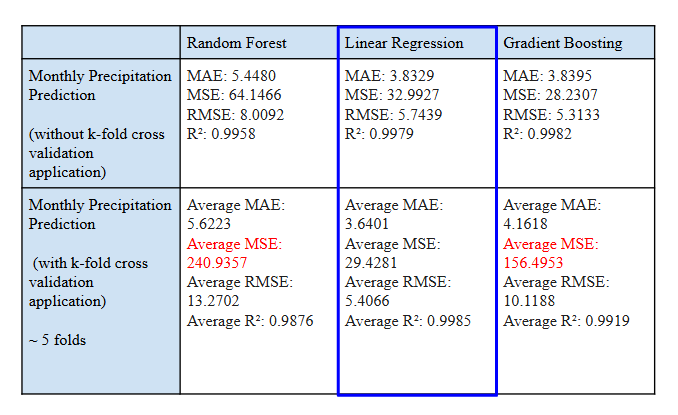



**2.4.6 (b) Application of K-fold cross validation on yearly dataset**

In [ ]:
# Define models
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...\n")

    # Reset fold-specific metrics for each model
    mae_scores = []
    mse_scores = []
    rmse_scores = []
    r2_scores = []
    kFold_year_predictions = []

    fold = 1
    for train_index, test_index in kf.split(data_year):
        X_year_train, X_year_test = X_year.iloc[train_index], X_year.iloc[test_index]
        y_year_train, y_year_test = y_year.iloc[train_index], y_year.iloc[test_index]

        # Train the model
        model.fit(X_year_train, y_year_train)

        # Predict
        y_pred = model.predict(X_year_test)

        # Calculate MAE, MSE, RMSE, and R²
        mae = mean_absolute_error(y_year_test, y_pred)
        mse = mean_squared_error(y_year_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_year_test, y_pred)

        # Store results
        mae_scores.append(mae)
        mse_scores.append(mse)
        rmse_scores.append(rmse)
        r2_scores.append(r2)
        kFold_year_predictions.append(y_pred)

        # Output results for the current fold
        print(f"Fold {fold} Results:")
        print(f"MAE: {mae:.4f}")
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"R²: {r2:.4f}")

        fold += 1

    # Calculate and store the average of each metric
    results[model_name]["MAE"] = np.mean(mae_scores)
    results[model_name]["MSE"] = np.mean(mse_scores)
    results[model_name]["RMSE"] = np.mean(rmse_scores)
    results[model_name]["R²"] = np.mean(r2_scores)

# Display average results for all models
print("\nAverage Results for All Models:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"Average MAE: {metrics['MAE']:.4f}")
    print(f"Average MSE: {metrics['MSE']:.4f}")
    print(f"Average RMSE: {metrics['RMSE']:.4f}")
    print(f"Average R²: {metrics['R²']:.4f}")


Evaluating Linear Regression...

Fold 1 Results:
MAE: 3.8539
MSE: 33.3419
RMSE: 5.7742
R²: 0.9978
Fold 2 Results:
MAE: 3.9311
MSE: 34.1342
RMSE: 5.8425
R²: 0.9987
Fold 3 Results:
MAE: 3.5065
MSE: 22.9011
RMSE: 4.7855
R²: 0.9988
Fold 4 Results:
MAE: 3.6571
MSE: 30.6005
RMSE: 5.5318
R²: 0.9984
Fold 5 Results:
MAE: 3.2509
MSE: 23.8048
RMSE: 4.8790
R²: 0.9985

Evaluating Random Forest...

Fold 1 Results:
MAE: 5.5588
MSE: 68.1487
RMSE: 8.2552
R²: 0.9956
Fold 2 Results:
MAE: 6.0602
MSE: 106.7198
RMSE: 10.3305
R²: 0.9960
Fold 3 Results:
MAE: 6.7142
MSE: 880.0703
RMSE: 29.6660
R²: 0.9554
Fold 4 Results:
MAE: 4.3392
MSE: 45.5662
RMSE: 6.7503
R²: 0.9977
Fold 5 Results:
MAE: 5.7615
MSE: 140.3798
RMSE: 11.8482
R²: 0.9913

Evaluating Gradient Boosting...

Fold 1 Results:
MAE: 3.8345
MSE: 28.4130
RMSE: 5.3304
R²: 0.9982
Fold 2 Results:
MAE: 4.2365
MSE: 41.3873
RMSE: 6.4333
R²: 0.9984
Fold 3 Results:
MAE: 5.2988
MSE: 648.3850
RMSE: 25.4634
R²: 0.9672
Fold 4 Results:
MAE: 3.1228
MSE: 20.9121
RMSE: 4.

**Key findings**

**Best Performance in Yearly Precipitation Prediction after applying k-fold cross validation:**

Similar to the monthly precipitation prediction, after conducting k-fold cross-validation, the results indicate a significant shift in the performance ranking of the models. Initially, Gradient Boosting appeared to be the best-performing model based on metrics such as MAE, MSE, RMSE, and R². However, the cross-validation results reveal that Linear Regression outperforms Gradient Boosting across all evaluation metrics.

A key observation is that after applying k-fold cross-validation, the MSE of both Gradient Boosting and Random Forest increased significantly, which suggests that these models were overfitting to the training data.

Similar to the monthly precipitation prediction, a significant finding is that k-fold cross-validation led to improved evaluation metrics for the Linear Regression model

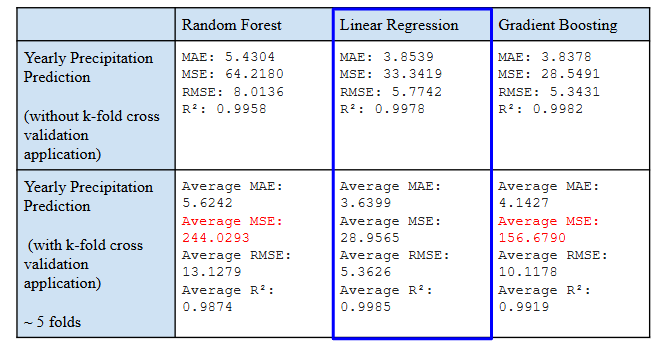





# 3. **Discussions**

Linear Regression, Random Forest, and Gradient Boosting were used to predict precipitation, with performance evaluated using MAE, MSE, RMSE, and R². Initially, after splitting the 624-row dataset into 80% training and 20% testing, all models showed strong performance, with Gradient Boosting slightly outperforming the others. The R² values for monthly predictions were 0.9958, 0.9979, and 0.9982 for Random Forest, Linear Regression, and Gradient Boosting, respectively, and similar patterns were observed for yearly predictions. These results suggest that the models fit the data well.

However, the high performance raised concerns about overfitting due to the small dataset (624 rows, with only 125 for testing). To address this, k-fold cross-validation was applied, leading to a shift in rankings. Linear Regression emerged as the best-performing model, while Gradient Boosting and Random Forest showed increased MSE and RMSE, indicating overfitting. This highlights the importance of validation to ensure models generalize effectively to unseen data.

In contrast, the performance of the Linear Regression model improved after applying k-fold cross-validation for both monthly and yearly precipitation predictions. This demonstrates its ability to generalize better across different data subsets. Unlike more complex models such as Gradient Boosting and Random Forest, Linear Regression does not rely on intricate patterns or non-linear relationships. As a result, it is less prone to overfitting noise or spurious correlations in the dataset, which is particularly advantageous in cases with limited data or simpler underlying trends.

Linear Regression's consistent performance in this analysis underscores the principle that simpler models can often outperform more complex ones when the data does not justify added complexity. In this case, the dataset of 624 rows may not provide sufficient information for complex models to perform reliably. Instead, Linear Regression's straightforward approach makes it robust, delivering reliable predictions without the risk of overfitting. Its consistent performance suggests that simplicity can sometimes outperform complexity, especially when dealing with limited or less complex datasets.

#4. **Conclusion**

In conclusion, Linear Regression appears to be the most stable model for this analysis. This analysis also emphasizes the importance of carefully matching the complexity of the model to the nature and size of the dataset. Future efforts could focus on expanding the dataset and testing additional features to determine whether more advanced models might outperform Linear Regression under different conditions.



#5. **Limitations**

1) **Small Data Size**: The dataset used for this analysis consists of only 624 rows in total, which represents a relatively small sample size.  This limited data size might affect the generalizability of the model's predictions, as it may not capture the full range of variation present in a larger, more complete dataset.

2) **Geographical Limitation**: The analysis was conducted using data solely from Labuan and Kuala Lumpur, which were selected due to the high amount of missing data from other states. This geographical limitation means that the model does not incorporate a representative sample of precipitation data from across the entire country of Malaysia. As a result, the predictions derived from this model may not accurately reflect precipitation patterns in other regions, and the findings may not provide a comprehensive overview of the precipitation trends across Malaysia as a whole.


#6. **Recommendations**

1) **Increase Data Collection by Combining with Other Datasets**: To improve model accuracy and generalizability, perhaps we could combine the existing dataset with additional data from other sources. This could involve gathering more data from Labuan and Kuala Lumpur, or expanding the dataset to include other states where precipitation data is available.

2) **Incorporate More Diverse Geographic Regions**:Future models should aim to incorporate data from a wider range of regions, especially those with reliable precipitation data. By including data from various geographic locations, the model can avoid being biased toward specific areas. This can enhance the model’s ability to predict precipitation patterns across the entire country, and capture regional differences.

3) **Feature importance analysis**: Conducting a performance feature importance analysis, particularly on the interaction terms such as thunderstorm * rainy days, would help identify which variables and interactions have the most significant impact on the predictions. This would provide insights into how specific features and their combinations contribute to the models' performance, enhancing our understanding of the underlying factors driving the results.

# 7. **References**



*    ​Ahmad Hamdan, Kenneth Ifeanyi Ibekwe, Emmanuel Augustine Etukudoh, Aniekan

*    Akpan Umoh, & Valentine Ikenna Ilojianya. (2024). AI and machine learning in climate change research: A review of predictive models and environmental impact. World Journal of Advanced Research and Reviews, 21(1), 1999–2008. https://doi.org/10.30574/wjarr.2024.21.1.0257

*    How rain and humidity connected?. Smart Fog. (2024, March 28). https://www.smartfog.com/how-rain-and-humidity-connected/

*    ​Mahesh, B. (2019). Machine Learning Algorithms -A Review. In International Journal of Science and Research (IJSR) (Vol. 9). https://doi.org/10.21275/ART20203995

*    ​Sulaiman, N. A. F., Shaharudin, S. M., Ismail, S., Zainuddin, N. H., Tan, M. L., & Jalil, Y. A. (2022). Predictive Modelling of Statistical Downscaling Based on Hybrid Machine Learning Model for Daily Rainfall in East-Coast Peninsular Malaysia. Symmetry, 14(5). https://doi.org/10.3390/sym14050927

*    ​Tang, K. H. D. (2019). Climate change in Malaysia: Trends, contributors, impacts, mitigation and adaptations. In Science of the Total Environment (Vol. 650, pp. 1858–1871). Elsevier B.V. https://doi.org/10.1016/j.scitotenv.2018.09.316

*    Vishvakarma, T. (2022). Climate Change Forecasting using Machine Learning Algorithms. In International Journal for Research in Applied Science & Engineering Technology (IJRASET) (Vol. 10). www.ijraset.com

*    ​Wamanse, R., & Patil, T. (2022). Analysis of various climate change parameters in India using machine learning. https://doi.org/10.48550/arXiv.2201.10123

*    Yau, Yat & Chew, B.T. & Saifullah, A Z A. (2012). Thermal comfort temperature range study for workers in a factory in Malaysia. 10th International Conference on Healthy Buildings 2012. 2. 1218-1223.